# Prepare input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Mar 16 05:35:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    50W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
# Command line tool for monitoring VM
! apt-get -qq install htop -y

Selecting previously unselected package htop.
(Reading database ... 128276 files and directories currently installed.)
Preparing to unpack .../htop_2.2.0-2build1_amd64.deb ...
Unpacking htop (2.2.0-2build1) ...
Setting up htop (2.2.0-2build1) ...
Processing triggers for mime-support (3.64ubuntu1) ...
Processing triggers for man-db (2.9.1-1) ...


## Load and clean

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('drive/MyDrive/w_review_train.csv', header = None)
df.columns = ['review']

df['review'] = df['review'].astype(str)
df['review'].replace('\n',' ', regex=True, inplace=True)

df['point'] = df['review'].str[-1:]
df['point'] = df['point'].astype(int)
df['review'] = df['review'].str[:-2]

df.to_csv('drive/MyDrive/clean_df.csv')

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/review_dataset/clean_df.csv')
df = df[['review','point']]
pd.set_option('display.max_colwidth', None)
df.head()

,review,point
0,ร้านอาหารใหญ่มากกกกกกก เลี้ยวเข้ามาเจอห้องน้ำก่อนเลย เออแปลกดี ห้องทานหลักๆอยู่ชั้น 2 มีกาแฟ น้ำผึ้ง ซึ่งก็แค่เอาน้ำผึ้งมาราด แพงเวอร์ อย่าสั่งเลย ลาบไข่ต้ม ไข่มันคาวอะ เลยไม่ประทับใจเท่าไหร่ ทอดมันหัวปลีกรอบอร่อยต้องเบิ้ล พะแนงห่อไข่อร่อยดี เห้ยแต่ราคา 150บาทมันเกินไปนะ รับไม่ไหวว เลิกกินแล้วมีขนมหวานให้กินฟรีเล็กน้อย )ขนมไทย) คงไม่ไปซ้ำ แพงเกิน,3
1,"อาหารที่นี่เป็นอาหารจีนแคะที่หากินยากในบ้านเรา ตัวร้านตั้งอยู่ที่ถนนพุทธมณฑลสาย 3 ไปตาม ถ.ปิ่นเกล้า-นครชัยศรี เมื่อถึงพุทธมณฑลสาย 3 ก็เลี้ยวเข้าไปประมาณ 500 เมตร ร้านอยู่ทางซ้ายมือค่ะ มีคนบอกมาว่าความพิเศษของร้านนี้คือกุ๊กเก่าและเป็นกุ๊กรุ่นสุดท้ายจาก ""ฮก ลก ซิ่ว” ภัตตาคารจีนชื่อดังย่านราชประสงค์ ที่เลิกกิจการไปแล้ว ต้องคนที่อายุเลข 5 ขึ้นไปจึงจะเคยกิน ฮก ลก ซิ่ว จานเด็ดที่มีขายที่นี่แห่งเดียวในเมืองไทยคือ ปลาเต๋าเต้ย 2 ฤดู เป็นสูตรจากมาเลเซีย นอกนั้นก็มี ผัดผักน้ำมันหอย ไก่เบตง เคาหยก ปูทะเลซุปน้ำใสหม้อไฟ เต้าหู้แคระยัดไส้หม้อดิน และ ลูกชิ้นแคระ อาหารที่เราแนะนำคือไก่เบตง (คล้ายๆไก่แช่เหล้า) เสริฟพร้อมกับหอมเจียว และน้ำจิ้มน้ำพริกเผาสูตรเด็ดของทางร้าน เมนูข้าวผัดหนำเลียบก็อร่อยค่ะ ชอบมากๆ",4
2,ปอเปี๊ยะสด ทุกวันนี้รู้สึกว่าหากินยาก (ร้านที่ขายปอเปี๊ยะสดอย่างเดียว ส่วนมากที่เจอคือขายตามภัตตาคารซึ่งมักจะไม่ค่อยอร่อย) ร้านนี้ที่สะพานเหลือง ราคาย่อมเยาเพียงแค่ 30 บาท จึงซื้อกินทุกครั้งที่มา รสชาติดีพอสมควรเลยโดยเฉพาะเต้าหู้กับกุนเชียงที่ใส่มาให้อย่างจุใจ ราดน้ำจิ้มที่โอเค ไม่ถึงกับสุดยอด เสิร์ฟพรัอมเครื่องเคียงต้นหอมกับพริกเขียว มาเสิร์ฟให้ถึงโต๊ะ (นั่งกินร้านข้างๆ) ครบถ้วนได้อารมณ์ เอาไป 4 ดาวครับคุณป้าสำหรับอาหาร แต่วันนั้น เจอเหตุการณ์คุณป้าให้อาหารแมวระหว่างทำปอเปี๊ยะ ไม่ใส่ถุงมือและไม่เห็นว่าล้างมือ ผมเลยจำเป็นต้องหักออกอีกหนึ่งดาว,3
3,รัานคัพเค้กในเมืองไทยมีไม่มาก หลายๆคนอาจจะสงสัยว่าคัพเค้กคืออะไร ต่างจากเค้กธรรมดาอย่างไร จริงๆแล้วคัพเค้กก็เป็น รูปแบบ หนึ่งของเค้กนั่นแหละครับ แต่ว่าคัพเค้กจะมีจุดเด่นอยู่ที่รสชาติที่เป็นเอกลักษณ์ เพราะใช้ส่วนผสมของครีมชีสเป็นหลักในการทำหน้าเค้ก หรือที่เรียกว่า frosting นอกจากนั้น คัพเค้กยังถือทานง่าย ขนย้ายง่ายกว่าเค้ก สุดท้ายคือการตกแต่งที่แตกต่างกันอย่างชัดเจนครับระหว่างคัพเค้กกับเค้ก ซึ่งการใช้คัพเค้กที่ตกแต่งสวยๆเพื่อใช้ในงานแต่งงาน งานวันเกิดหรือ event ต่างๆนั้นกำลังมาเลยทีเดียว เรียกได้ว่าคู่ไหน บริษัทไหนอยากฮิป ก็ต้องสั่งคัพเค้กนี่ล่ะครับไปออกงาน event สำหรับร้าน cupcake love นี้เพิ่งเปิดได้ไม่นานตั้งอยู่ที่ digital gateway ชั้นสาม เดินทางสะดวกเพราะติดกับทางเชื่อม BTS เลย ร้านน่ารักดีครับ เพิ่งเปิดร้านใหม่หลายๆอย่างก็ดูลนๆ แต่ก็ดูคึกคักดี ผมได้ทานครบทุกรสแล้ว รสชาติดีมากเพราะว่าเค้กมันชุ่มจริงๆ ชุ่มกว่าเค้กธรรมดาซะอีก ราคาก็ดีนะที่ 59 บาทต่อชิ้น ได้ทาน pink lemonade (ที่ที่ร้านเรียกว่า love lemonade) ไปแล้วก็รู้สึกว่าเข้มข้น เปรี้ยวถึงใจ หาทานยากด้วย ประทับใจครับ อ้อ ร้านนี้รับสั่งทำส่งแบบ made to order ด้วยนะครับ,5
4,อร่อย!!! เดินผ่านDigital gatewayทุกวัน ไม่ยักรู้ว่ามีร้านนี้ (เอ๊ะหรือพึ่งเปิด) หาง่ายมากครับ เดินจากBTSสยามเข้ามาก็เห็นเลย ร้านสีชมพูแปร๊นๆ ไม่เคยทานcup cakeเลย แต่ที่ร้านเค้ามีให้ชิม พอได้ชิมครั้งแรกก็ติดใจเลยครับ แล้วจะไปอุดหนุนใหม่ให้ครบทุกรสเลย ^^,5


## Tokenization

In [ ]:
! pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 17.3 MB/s eta 0:00:00


In [ ]:
import pythainlp

def preprocess_text(text):
    # Tokenize the Thai text
    tokens = pythainlp.word_tokenize(text, engine='newmm')
    
    # Normalize the Thai text by removing any diacritics
    normalized_tokens = [pythainlp.util.normalize(token) for token in tokens]
    
    # Remove any stop words from the Thai text
    # stop_words = pythainlp.corpus.common.thai_stopwords()
    filtered_tokens = [token for token in normalized_tokens]
    
    # Join the filtered tokens back into a string
    processed_text = ' '.join(filtered_tokens)
    
    return processed_text

In [ ]:
#Remove emoji
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

df['review'] = df.apply(lambda row: deEmojify(row['review']), axis=1)

In [ ]:
# Apply the preprocess function to the "review" column of the input dataframe
df['review'] = df['review'].apply(preprocess_text)

In [ ]:
# Convert datatype
df['review'] = df['review'].astype(str)
df['point'] = df['point'].astype(int)

<AxesSubplot:xlabel='point'>

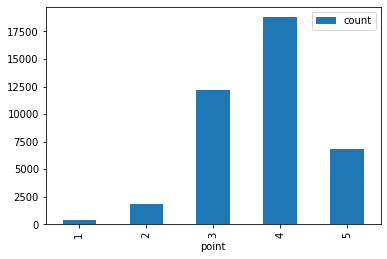

In [ ]:
temp = df["point"].value_counts().to_frame().reset_index()
temp.rename(columns = {'index':'point', 'point':'count'}, inplace = True)
temp = temp[['point','count']].sort_values(by='point')
temp.plot(kind='bar', x='point', y='count')

## Split Train Test

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.20, random_state=123)

<AxesSubplot:>

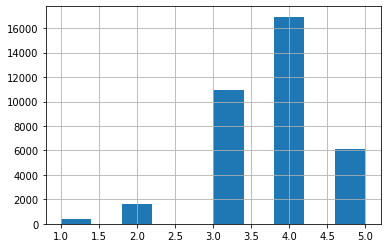

In [ ]:
train["point"].hist()

<AxesSubplot:xlabel='point'>

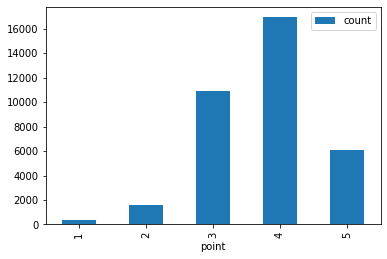

In [ ]:
temp = train["point"].value_counts().to_frame().reset_index()
temp.rename(columns = {'index':'point', 'point':'count'}, inplace = True)
temp = temp[['point','count']].sort_values(by='point')
temp.plot(kind='bar', x='point', y='count')

In [ ]:
test['point'].value_counts()

4    3697
3    2452
5    1366
2     402
1      83
Name: point, dtype: int64

## Save as directory

In [ ]:
# Split positive and negative for making directory
train_1 = train[train['point']==1]
train_2 = train[train['point']==2]
train_3 = train[train['point']==3]
train_4 = train[train['point']==4]
train_5 = train[train['point']==5]
test_1 = test[test['point']==1]
test_2 = test[test['point']==2]
test_3 = test[test['point']==3]
test_4 = test[test['point']==4]
test_5 = test[test['point']==5]

In [ ]:
!rm -rf /content/wongnai

In [ ]:
! mkdir /content/wongnai
! mkdir /content/wongnai/train
! mkdir /content/wongnai/train/1
! mkdir /content/wongnai/train/2
! mkdir /content/wongnai/train/3
! mkdir /content/wongnai/train/4
! mkdir /content/wongnai/train/5
! mkdir /content/wongnai/test
! mkdir /content/wongnai/test/1
! mkdir /content/wongnai/test/2
! mkdir /content/wongnai/test/3
! mkdir /content/wongnai/test/4
! mkdir /content/wongnai/test/5

In [ ]:
for i in range(len(train_1)):
    filename = '/content/wongnai/train/1/'+ str(i) + '.txt'
    with open(filename, 'w') as f:
        f.write(train_1.iloc[i, 0])

for i in range(len(train_2)):
    filename = '/content/wongnai/train/2/'+ str(i) + '.txt'
    with open(filename, 'w') as f:
        f.write(train_2.iloc[i, 0])

for i in range(len(train_3)):
    filename = '/content/wongnai/train/3/'+ str(i) + '.txt'
    with open(filename, 'w') as f:
        f.write(train_3.iloc[i, 0])

for i in range(len(train_4)):
    filename = '/content/wongnai/train/4/'+ str(i) + '.txt'
    with open(filename, 'w') as f:
        f.write(train_4.iloc[i, 0])

for i in range(len(train_5)):
    filename = '/content/wongnai/train/5/'+ str(i) + '.txt'
    with open(filename, 'w') as f:
        f.write(train_5.iloc[i, 0])

for i in range(len(test_1)):
    filename = '/content/wongnai/test/1/'+ str(i) + '.txt'
    with open(filename, 'w') as f:
        f.write(test_1.iloc[i, 0])

for i in range(len(test_2)):
    filename = '/content/wongnai/test/2/'+ str(i) + '.txt'
    with open(filename, 'w') as f:
        f.write(test_2.iloc[i, 0])

for i in range(len(test_3)):
    filename = '/content/wongnai/test/3/'+ str(i) + '.txt'
    with open(filename, 'w') as f:
        f.write(test_3.iloc[i, 0])

for i in range(len(test_4)):
    filename = '/content/wongnai/test/4/'+ str(i) + '.txt'
    with open(filename, 'w') as f:
        f.write(test_4.iloc[i, 0])

for i in range(len(test_5)):
    filename = '/content/wongnai/test/5/'+ str(i) + '.txt'
    with open(filename, 'w') as f:
        f.write(test_5.iloc[i, 0])

In [ ]:
!zip -r wongnai.zip /content/wongnai

In [ ]:
from google.colab import files
files.download('/content/wongnai_pure.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Set up

In [ ]:
!cp "/content/drive/MyDrive/wongnai_pure.zip" "/content/wongnai.zip"

In [ ]:
!unzip -uq "/content/wongnai.zip" -d "/"

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os, pathlib, shutil, random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential, Input, Model, regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Activation, AveragePooling1D, TextVectorization, Reshape, GlobalMaxPooling1D
from tensorflow.keras.layers import Dense, Flatten, Softmax, Dropout, Embedding, SimpleRNN, LSTM, GRU, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling, RandomWidth, RandomHeight, Lambda
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
import kerastuner as kt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay


<ipython-input-10-de00e55ca45a>:19: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


## Validation set

In [ ]:
# Split train and validation set from directory
base_dir = pathlib.Path("/content/wongnai")
val_dir = base_dir / "val"
train_dir = base_dir / "train"
for category in ("1", "2", "3", "4", "5"):
  os.makedirs(val_dir / category)
  files = os.listdir(train_dir / category)
  # Shuffle the list of training files using a seed to support repreducability 
  random.Random(42).shuffle(files)
  # Take 25% of the training  files to use for validation.
  num_val_samples = int(0.25 * len(files))
  val_files = files[-num_val_samples:]
  # Move the files to aclImdb/val/neg and aclImdb/val/pos.
  for fname in val_files:
    shutil.move(train_dir / category / fname,
                val_dir / category / fname)

In [ ]:
# Yield inputs that are TensorFlow tf.string tensors and targets that are int32 tensors encoding the value “0” or “1.”
batch_size = 32

train_ds = keras.utils.text_dataset_from_directory(
    "/content/wongnai/train", batch_size=batch_size, label_mode='categorical'
)
val_ds = keras.utils.text_dataset_from_directory(
    "/content/wongnai/val", batch_size=batch_size, label_mode='categorical'
)
test_ds = keras.utils.text_dataset_from_directory(
    "/content/wongnai/test", batch_size=batch_size, label_mode='categorical'
)
# Prepare a dataset that only yields raw text inputs (no labels) for TextVectorization
text_only_train_ds = train_ds.map(lambda x, y: x)

Found 24002 files belonging to 5 classes.
Found 7998 files belonging to 5 classes.


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Found 8000 files belonging to 5 classes.


In [ ]:
# test print input and target
for inputs, targets in train_ds:
  print("inputs.shape:", inputs.shape)
  print("inputs.dtype:", inputs.dtype)
  print("targets.shape:", targets.shape)
  print("targets.dtype:", targets.dtype)
  print("inputs[0]:", inputs[0])
  print("targets[0]:", targets[0])
  break

inputs.shape: (32,)
inputs.dtype: <dtype: 'string'>
targets.shape: (32, 5)
targets.dtype: <dtype: 'float32'>
inputs[0]: tf.Tensor(b'\xe0\xb8\xa7\xe0\xb8\xb1\xe0\xb8\x99\xe0\xb8\x99\xe0\xb8\xb5\xe0\xb9\x89 \xe0\xb8\x9e\xe0\xb8\xb2 \xe0\xb9\x81\xe0\xb8\xa1\xe0\xb9\x88 \xe0\xb8\xa1\xe0\xb8\xb2 \xe0\xb8\x8b\xe0\xb8\xb7\xe0\xb9\x89\xe0\xb8\xad \xe0\xb9\x80\xe0\xb8\xaa\xe0\xb8\xb7\xe0\xb9\x89\xe0\xb8\xad \xe0\xb8\x97\xe0\xb8\xb5\xe0\xb9\x88 \xe0\xb8\xad\xe0\xb8\xad\xe0\xb8\x81\xe0\xb9\x81\xe0\xb8\x9a\xe0\xb8\x9a \xe0\xb9\x82\xe0\xb8\x94\xe0\xb8\xa2 \xe0\xb8\x9e\xe0\xb8\xa3\xe0\xb8\xb0 \xe0\xb9\x80\xe0\xb8\x97\xe0\xb8\x9e  \xe0\xb8\xaf  \xe0\xb8\x84\xe0\xb9\x88\xe0\xb8\xb2  \xe0\xb8\xab\xe0\xb8\xa5\xe0\xb8\xb1\xe0\xb8\x87\xe0\xb8\x88\xe0\xb8\xb2\xe0\xb8\x81 \xe0\xb8\xa3\xe0\xb8\xad \xe0\xb9\x81\xe0\xb8\xa1\xe0\xb9\x88 \xe0\xb9\x80\xe0\xb8\xa5\xe0\xb8\xb7\xe0\xb8\xad\xe0\xb8\x81 \xe0\xb8\xad\xe0\xb8\xa2\xe0\xb8\xb9\xe0\xb9\x88 \xe0\xb8\x99\xe0\xb8\xb2\xe0\xb8\x99 \xe0\xb8\x9e\xe0\xb8\xad\xe0\x

## Call Back Set up

In [ ]:
# callbacks set up
model_checkpoint_cb1 = ModelCheckpoint('model1', monitor='val_accuracy', save_best_only=True)
model_checkpoint_cb2 = ModelCheckpoint('model2', monitor='val_accuracy', save_best_only=True)
model_checkpoint_cb3 = ModelCheckpoint('model3', monitor='val_accuracy', save_best_only=True)
model_checkpoint_cb4 = ModelCheckpoint('model4', monitor='val_accuracy', save_best_only=True)
model_checkpoint_cb5 = ModelCheckpoint('model5', monitor='val_accuracy', save_best_only=True)
model_checkpoint_cb6 = ModelCheckpoint('model6', monitor='val_accuracy', save_best_only=True)
model_checkpoint_cb7 = ModelCheckpoint('model7', monitor='val_accuracy', save_best_only=True)
model_checkpoint_cb8 = ModelCheckpoint('model8', monitor='val_accuracy', save_best_only=True)
model_checkpoint_cb9 = ModelCheckpoint('model9', monitor='val_accuracy', save_best_only=True)
model_checkpoint_cb10 = ModelCheckpoint('model10', monitor='val_accuracy', save_best_only=True)
model_checkpoint_cb11 = ModelCheckpoint('model11', monitor='val_accuracy', save_best_only=True)
model_checkpoint_cb12 = ModelCheckpoint('model12', monitor='val_accuracy', save_best_only=True)

reduce_lr_cb = ReduceLROnPlateau(min_lr=0.001)

# measured for 5 epochs and roll back to the best model

from tensorflow.keras.callbacks import EarlyStopping
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=20, 
                                  min_delta = 0.0001, restore_best_weights = True)

## Vectorization

In [ ]:
# TextVectorization layer is fast and efficient to vectorizetext 
# By default, the TextVectorization layer will remove punctuation” for text standardization, and “split on whitespace” for tokenization.
text_vectorization = TextVectorization(
    max_tokens=5000,
    output_mode="int", # Configures the layer to return sequences of words encoded as integer indices.
)

In [ ]:
# index the vocabulary of a text corpus using adapt() method
text_vectorization.adapt(text_only_train_ds)

In [ ]:
# # retrieve the computed vocabulary
# There are two special tokens that you will commonly use: 
# the mask token (index 0) for padding and the OOV token (index 1) - not recognize words
vocabulary = text_vectorization.get_vocabulary()
#vocabulary

In [ ]:
max_length = 416
max_tokens = 5000

# Preparing integer sequence datasets
text_vectorization = TextVectorization(
    max_tokens=max_tokens,
    output_mode="int",
    output_sequence_length=max_length,
)
text_vectorization.adapt(text_only_train_ds)

int_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
int_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
int_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

# Bi-LSTM

## Model Achitecture

In [ ]:
tf.random.set_seed(42)

def build_model(hp):
  # One input is a sequence of integers.
  inputs = Input(shape=(None,), dtype="int64")
  # Encode the integers into binary 20,000-dimensional vectors
  embedded = tf.one_hot(inputs, depth=max_tokens)
  # Add a bidirectional LSTM.
  j = hp.Choice("units", values=[16,64,128])
  k = hp.Choice("dropout", values=[0.1,0.3,0.5])
  for i in range(hp.Int("num_layers", 1, 4)):
    if i == 1:
      x = Bidirectional(LSTM(units=j))(embedded)
      x = Dropout(k)(x)
    elif i == 2:
      x = Bidirectional(LSTM(units=j, return_sequences=True))(embedded)
      x = Dropout(k)(x)
      x = Bidirectional(LSTM(units=j))(x)
      x = Dropout(k)(x)
    elif i == 3:
      x = Bidirectional(LSTM(units=j, return_sequences=True))(embedded)
      x = Dropout(k)(x)
      x = Bidirectional(LSTM(units=j, return_sequences=True))(x)
      x = Dropout(k)(x)
      x = Bidirectional(LSTM(units=j))(x)
      x = Dropout(k)(x)
    else:
      x = Bidirectional(LSTM(units=j, return_sequences=True))(embedded)
      x = Dropout(k)(x)
      x = Bidirectional(LSTM(units=j, return_sequences=True))(x)
      x = Dropout(k)(x)
      x = Bidirectional(LSTM(units=j, return_sequences=True))(x)
      x = Dropout(k)(x)
      x = Bidirectional(LSTM(units=j))(x)
      x = Dropout(k)(x)
  # Add a classification Layer
  outputs = Dense(5, activation="softmax")(x)
  model = Model(inputs, outputs)
  model.compile(optimizer="adam",
      loss="categorical_crossentropy",
      metrics="accuracy")
  return model

### Search Space

In [ ]:
stop_early = EarlyStopping(monitor='val_loss', patience=3, 
                                  min_delta = 0.001, restore_best_weights = True)

# Instantiate the tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective=kt.Objective("val_loss", direction="min"),
    max_trials=8)

# Display search space summary
tuner.search_space_summary()

Search space summary
Default search space size: 3
units (Choice)
{'default': 16, 'conditions': [], 'values': [16, 64, 128], 'ordered': True}
dropout (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.2, 0.3, 0.4, 0.5], 'ordered': True}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}


### Hyperparmeter Tuning

In [ ]:
tuner.search(int_train_ds, validation_data=int_val_ds, epochs=10, batch_size=512, callbacks=[stop_early])

Trial 10 Complete [00h 15m 06s]
val_loss: 1.067358374595642

Best val_loss So Far: 0.1311245560646057
Total elapsed time: 01h 20m 26s


### Refit with best parameter

In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

print(best_hps.get('num_layers')) 
print(best_hps.get('units')) 
print(best_hps.get('dropout'))

1
64
0.5


In [ ]:
# Fit model
model = tuner.hypermodel.build(best_hps)
history = model.fit(int_train_ds, 
                    validation_data=int_val_ds,
                    epochs=1000,
                    callbacks=[model_checkpoint_cb1, reduce_lr_cb, early_stopping_cb])

Epoch 1/1000
751/751 [==============================] - ETA: 0s - loss: 1.1872 - accuracy: 0.4650

751/751 [==============================] - 145s 178ms/step - loss: 1.1872 - accuracy: 0.4650 - val_loss: 1.1525 - val_accuracy: 0.4714 - lr: 0.0010
Epoch 2/1000
751/751 [==============================] - ETA: 0s - loss: 1.1652 - accuracy: 0.4691

751/751 [==============================] - 133s 176ms/step - loss: 1.1652 - accuracy: 0.4691 - val_loss: 1.1258 - val_accuracy: 0.4875 - lr: 0.0010
Epoch 3/1000
751/751 [==============================] - 88s 118ms/step - loss: 1.1173 - accuracy: 0.4874 - val_loss: 1.1576 - val_accuracy: 0.4744 - lr: 0.0010
Epoch 4/1000
751/751 [==============================] - 88s 118ms/step - loss: 1.0776 - accuracy: 0.5112 - val_loss: 1.1270 - val_accuracy: 0.4747 - lr: 0.0010
Epoch 5/1000
751/751 [==============================] - ETA: 0s - loss: 0.9907 - accuracy: 0.5570

751/751 [==============================] - 129s 171ms/step - loss: 0.9907 - accuracy: 0.5570 - val_loss: 1.0799 - val_accuracy: 0.5129 - lr: 0.0010
Epoch 6/1000
751/751 [==============================] - 89s 118ms/step - loss: 0.9446 - accuracy: 0.5866 - val_loss: 1.1242 - val_accuracy: 0.4977 - lr: 0.0010
Epoch 7/1000
751/751 [==============================] - ETA: 0s - loss: 0.9071 - accuracy: 0.6053

751/751 [==============================] - 134s 178ms/step - loss: 0.9071 - accuracy: 0.6053 - val_loss: 1.0683 - val_accuracy: 0.5255 - lr: 0.0010
Epoch 8/1000
751/751 [==============================] - 88s 118ms/step - loss: 0.9237 - accuracy: 0.6005 - val_loss: 1.2595 - val_accuracy: 0.4706 - lr: 0.0010
Epoch 9/1000
751/751 [==============================] - 89s 118ms/step - loss: 1.0636 - accuracy: 0.5271 - val_loss: 1.1734 - val_accuracy: 0.4614 - lr: 0.0010
Epoch 10/1000
751/751 [==============================] - 89s 118ms/step - loss: 0.9761 - accuracy: 0.5702 - val_loss: 1.1167 - val_accuracy: 0.4889 - lr: 0.0010
Epoch 11/1000
751/751 [==============================] - 89s 118ms/step - loss: 1.0702 - accuracy: 0.5147 - val_loss: 1.1692 - val_accuracy: 0.4595 - lr: 0.0010
Epoch 12/1000
751/751 [==============================] - 88s 118ms/step - loss: 0.9541 - accuracy: 0.5840 - val_loss: 1.0934 - val_accuracy: 0.5063 - lr: 0.0010
Epoch 13/1000
751/751 [==========================

751/751 [==============================] - 132s 176ms/step - loss: 0.8558 - accuracy: 0.6357 - val_loss: 1.0890 - val_accuracy: 0.5270 - lr: 0.0010
Epoch 14/1000
751/751 [==============================] - 89s 118ms/step - loss: 0.8476 - accuracy: 0.6508 - val_loss: 1.1659 - val_accuracy: 0.5004 - lr: 0.0010
Epoch 15/1000
751/751 [==============================] - 88s 118ms/step - loss: 0.7497 - accuracy: 0.6930 - val_loss: 1.2202 - val_accuracy: 0.4821 - lr: 0.0010
Epoch 16/1000
751/751 [==============================] - 89s 118ms/step - loss: 0.6811 - accuracy: 0.7285 - val_loss: 1.3128 - val_accuracy: 0.4854 - lr: 0.0010
Epoch 17/1000
751/751 [==============================] - 89s 118ms/step - loss: 0.6123 - accuracy: 0.7638 - val_loss: 1.4539 - val_accuracy: 0.4842 - lr: 0.0010
Epoch 18/1000
751/751 [==============================] - 88s 118ms/step - loss: 0.5871 - accuracy: 0.7730 - val_loss: 1.4901 - val_accuracy: 0.4875 - lr: 0.0010
Epoch 19/1000
751/751 [========================

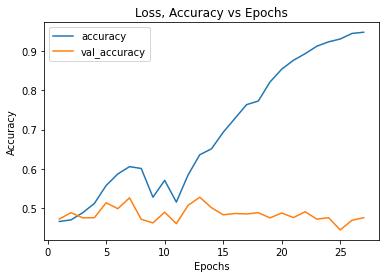

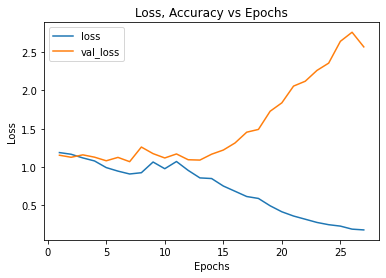

In [ ]:
#plot the learning curves
import matplotlib
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label = 'accuracy')
plt.plot(epochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
!zip -r /content/model1.zip /content/model1

  adding: content/model1/ (stored 0%)
  adding: content/model1/fingerprint.pb (stored 0%)
  adding: content/model1/variables/ (stored 0%)
  adding: content/model1/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/model1/variables/variables.index (deflated 71%)
  adding: content/model1/keras_metadata.pb (deflated 94%)
  adding: content/model1/assets/ (stored 0%)
  adding: content/model1/saved_model.pb (deflated 91%)


In [ ]:
from google.colab import files
files.download('/content/model1.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Evaluation

In [ ]:
!unzip -uq "/content/model1.zip" -d "/"

250/250 [==============================] - 19s 49ms/step
[[   0    1   15   61    6]
 [   0    2   86  289   25]
 [   5   12  505 1747  183]
 [   5   32  739 2690  231]
 [   1    6  290  977   92]]
              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        83
           2     0.0377    0.0050    0.0088       402
           3     0.3089    0.2060    0.2471      2452
           4     0.4667    0.7276    0.5687      3697
           5     0.1713    0.0673    0.0967      1366

    accuracy                         0.4111      8000
   macro avg     0.1969    0.2012    0.1843      8000
weighted avg     0.3415    0.4111    0.3555      8000

(0.411125, 0.411125, 0.411125, None)


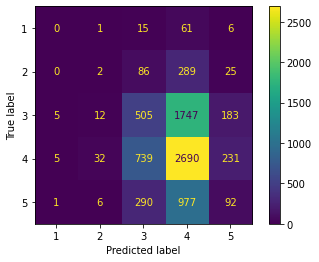

In [ ]:
model = keras.models.load_model("model1")
preds = model.predict(int_test_ds)
preds = np.argmax(preds, axis=1)+1
truths = np.concatenate([y for x, y in int_test_ds.as_numpy_iterator()], axis=0)
truths = np.argmax(truths, axis=1)+1

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay, classification_report

print(confusion_matrix(truths, preds))
print(classification_report(truths, preds, digits=4))
print(precision_recall_fscore_support(truths, preds, average='micro'))

ConfusionMatrixDisplay.from_predictions(truths, preds)

## Add more complexity and reduce learning rate

In [ ]:
tf.random.set_seed(42)

def get_model():
  # One input is a sequence of integers.
  inputs = Input(shape=(None,), dtype="int64")
  # Encode the integers into binary 20,000-dimensional vectors
  embedded = tf.one_hot(inputs, depth=max_tokens)
  x = Bidirectional(LSTM(units=64, activation="tanh", kernel_initializer="he_normal"))(embedded)
  x = BatchNormalization()(x)
  x = Dropout(0.5)(x)
  # Add a classification Layer
  outputs = Dense(5, activation="softmax")(x)
  model = Model(inputs, outputs)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
      loss="categorical_crossentropy",
      metrics=["accuracy"])
  return model

In [ ]:
model = get_model()
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None)]            0         
                                                                 
 tf.one_hot_5 (TFOpLambda)   (None, None, 5000)        0         
                                                                 
 bidirectional_11 (Bidirecti  (None, 128)              2593280   
 onal)                                                           
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 645 

### Refit final model

In [ ]:
history = model.fit(int_train_ds,
          validation_data=int_val_ds,
          epochs=1000,
          callbacks=[model_checkpoint_cb5, reduce_lr_cb, early_stopping_cb])

Epoch 1/1000
751/751 [==============================] - ETA: 0s - loss: 1.4781 - accuracy: 0.3532

751/751 [==============================] - 41s 49ms/step - loss: 1.4781 - accuracy: 0.3532 - val_loss: 1.3003 - val_accuracy: 0.4631 - lr: 1.0000e-04
Epoch 2/1000
751/751 [==============================] - 26s 34ms/step - loss: 1.1648 - accuracy: 0.5073 - val_loss: 1.4644 - val_accuracy: 0.3871 - lr: 1.0000e-04
Epoch 3/1000
751/751 [==============================] - 26s 34ms/step - loss: 1.0319 - accuracy: 0.5567 - val_loss: 1.7378 - val_accuracy: 0.3167 - lr: 1.0000e-04
Epoch 4/1000
751/751 [==============================] - 26s 34ms/step - loss: 0.9833 - accuracy: 0.5748 - val_loss: 1.5519 - val_accuracy: 0.3882 - lr: 1.0000e-04
Epoch 5/1000
751/751 [==============================] - ETA: 0s - loss: 0.9404 - accuracy: 0.5932

751/751 [==============================] - 40s 53ms/step - loss: 0.9404 - accuracy: 0.5932 - val_loss: 1.3921 - val_accuracy: 0.4950 - lr: 1.0000e-04
Epoch 6/1000
751/751 [==============================] - 30s 40ms/step - loss: 0.9039 - accuracy: 0.6079 - val_loss: 2.7584 - val_accuracy: 0.3207 - lr: 1.0000e-04
Epoch 7/1000
751/751 [==============================] - 26s 35ms/step - loss: 0.8663 - accuracy: 0.6259 - val_loss: 2.9351 - val_accuracy: 0.4831 - lr: 1.0000e-04
Epoch 8/1000
751/751 [==============================] - 26s 35ms/step - loss: 0.8345 - accuracy: 0.6417 - val_loss: 6.1824 - val_accuracy: 0.4712 - lr: 1.0000e-04
Epoch 9/1000
751/751 [==============================] - 26s 34ms/step - loss: 0.8076 - accuracy: 0.6558 - val_loss: 4.7847 - val_accuracy: 0.4711 - lr: 1.0000e-04
Epoch 10/1000
751/751 [==============================] - 26s 34ms/step - loss: 0.7800 - accuracy: 0.6659 - val_loss: 14.0469 - val_accuracy: 0.0614 - lr: 1.0000e-04
Epoch 11/1000
751/751 [==========

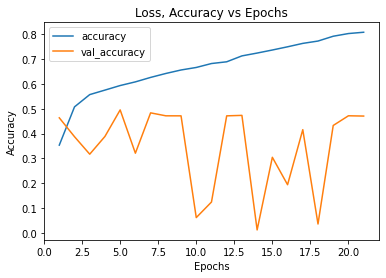

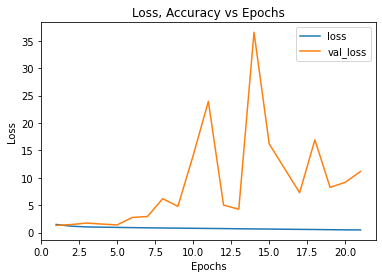

In [ ]:
#plot the learning curves
import matplotlib
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label = 'accuracy')
plt.plot(epochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
!zip -r /content/model5.zip /content/model5

  adding: content/model5/ (stored 0%)
  adding: content/model5/variables/ (stored 0%)
  adding: content/model5/variables/variables.index (deflated 63%)
  adding: content/model5/variables/variables.data-00000-of-00001 (deflated 5%)
  adding: content/model5/fingerprint.pb (stored 0%)
  adding: content/model5/saved_model.pb (deflated 91%)
  adding: content/model5/keras_metadata.pb (deflated 89%)
  adding: content/model5/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download('/content/model5.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Re-Evaluation

In [ ]:
!unzip -uq "/content/model5.zip" -d "/"

250/250 [==============================] - 4s 14ms/step
[[   0    0    4   79    0]
 [   0    0    9  392    1]
 [   0    0   76 2364   12]
 [   0    0  102 3579   16]
 [   0    0   37 1327    2]]
              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        83
           2     0.0000    0.0000    0.0000       402
           3     0.3333    0.0310    0.0567      2452
           4     0.4623    0.9681    0.6258      3697
           5     0.0645    0.0015    0.0029      1366

    accuracy                         0.4571      8000
   macro avg     0.1720    0.2001    0.1371      8000
weighted avg     0.3268    0.4571    0.3071      8000

(0.457125, 0.457125, 0.457125, None)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


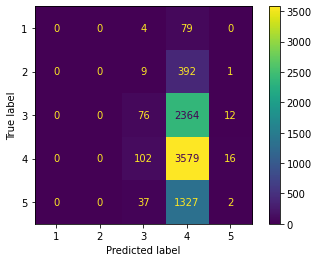

In [ ]:
model = keras.models.load_model("model5")
preds = model.predict(int_test_ds)
preds = np.argmax(preds, axis=1)+1
truths = np.concatenate([y for x, y in int_test_ds.as_numpy_iterator()], axis=0)
truths = np.argmax(truths, axis=1)+1

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay, classification_report

print(confusion_matrix(truths, preds))
print(classification_report(truths, preds, digits=4))
print(precision_recall_fscore_support(truths, preds, average='micro'))

ConfusionMatrixDisplay.from_predictions(truths, preds)

## More reduced learning rate

In [ ]:
tf.random.set_seed(42)

def get_model():
  # One input is a sequence of integers.
  inputs = Input(shape=(None,), dtype="int64")
  # Encode the integers into binary 20,000-dimensional vectors
  embedded = tf.one_hot(inputs, depth=max_tokens)
  x = Bidirectional(LSTM(units=64, activation="tanh", kernel_initializer="he_normal"))(embedded)
  x = BatchNormalization()(x)
  x = Dropout(0.5)(x)
  # Add a classification Layer
  outputs = Dense(5, activation="softmax")(x)
  model = Model(inputs, outputs)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
      loss="categorical_crossentropy",
      metrics=["accuracy"])
  return model

In [ ]:
model = get_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 tf.one_hot_3 (TFOpLambda)   (None, None, 5000)        0         
                                                                 
 bidirectional (Bidirectiona  (None, 128)              2593280   
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 5)                 645   

### Refit Model

In [ ]:
history = model.fit(int_train_ds,
          validation_data=int_val_ds,
          epochs=1000,
          callbacks=[model_checkpoint_cb11, reduce_lr_cb, early_stopping_cb])

Epoch 1/1000
751/751 [==============================] - ETA: 0s - loss: 1.6419 - accuracy: 0.2053

751/751 [==============================] - 44s 52ms/step - loss: 1.6419 - accuracy: 0.2053 - val_loss: 1.5770 - val_accuracy: 0.2894 - lr: 1.0000e-05
Epoch 2/1000
751/751 [==============================] - ETA: 0s - loss: 1.5978 - accuracy: 0.2552

751/751 [==============================] - 37s 50ms/step - loss: 1.5978 - accuracy: 0.2552 - val_loss: 1.5519 - val_accuracy: 0.3352 - lr: 1.0000e-05
Epoch 3/1000
751/751 [==============================] - ETA: 0s - loss: 1.5608 - accuracy: 0.3037

751/751 [==============================] - 37s 49ms/step - loss: 1.5608 - accuracy: 0.3037 - val_loss: 1.5186 - val_accuracy: 0.3838 - lr: 1.0000e-05
Epoch 4/1000
751/751 [==============================] - ETA: 0s - loss: 1.5209 - accuracy: 0.3442

751/751 [==============================] - 37s 49ms/step - loss: 1.5209 - accuracy: 0.3442 - val_loss: 1.4865 - val_accuracy: 0.4079 - lr: 1.0000e-05
Epoch 5/1000
751/751 [==============================] - ETA: 0s - loss: 1.4855 - accuracy: 0.3789

751/751 [==============================] - 37s 49ms/step - loss: 1.4855 - accuracy: 0.3789 - val_loss: 1.4549 - val_accuracy: 0.4286 - lr: 1.0000e-05
Epoch 6/1000
751/751 [==============================] - ETA: 0s - loss: 1.4477 - accuracy: 0.4087

751/751 [==============================] - 37s 49ms/step - loss: 1.4477 - accuracy: 0.4087 - val_loss: 1.4246 - val_accuracy: 0.4424 - lr: 1.0000e-05
Epoch 7/1000
751/751 [==============================] - ETA: 0s - loss: 1.4136 - accuracy: 0.4258

751/751 [==============================] - 37s 49ms/step - loss: 1.4136 - accuracy: 0.4258 - val_loss: 1.3934 - val_accuracy: 0.4471 - lr: 1.0000e-05
Epoch 8/1000
751/751 [==============================] - ETA: 0s - loss: 1.3786 - accuracy: 0.4453

751/751 [==============================] - 37s 49ms/step - loss: 1.3786 - accuracy: 0.4453 - val_loss: 1.3630 - val_accuracy: 0.4530 - lr: 1.0000e-05
Epoch 9/1000
751/751 [==============================] - ETA: 0s - loss: 1.3461 - accuracy: 0.4561

751/751 [==============================] - 37s 49ms/step - loss: 1.3461 - accuracy: 0.4561 - val_loss: 1.3346 - val_accuracy: 0.4561 - lr: 1.0000e-05
Epoch 10/1000
751/751 [==============================] - ETA: 0s - loss: 1.3177 - accuracy: 0.4616

751/751 [==============================] - 37s 49ms/step - loss: 1.3177 - accuracy: 0.4616 - val_loss: 1.3085 - val_accuracy: 0.4597 - lr: 1.0000e-05
Epoch 11/1000
751/751 [==============================] - ETA: 0s - loss: 1.2885 - accuracy: 0.4691

751/751 [==============================] - 37s 49ms/step - loss: 1.2885 - accuracy: 0.4691 - val_loss: 1.2836 - val_accuracy: 0.4631 - lr: 1.0000e-05
Epoch 12/1000
751/751 [==============================] - ETA: 0s - loss: 1.2644 - accuracy: 0.4730

751/751 [==============================] - 37s 50ms/step - loss: 1.2644 - accuracy: 0.4730 - val_loss: 1.2633 - val_accuracy: 0.4646 - lr: 1.0000e-05
Epoch 13/1000
751/751 [==============================] - ETA: 0s - loss: 1.2378 - accuracy: 0.4823

751/751 [==============================] - 37s 50ms/step - loss: 1.2378 - accuracy: 0.4823 - val_loss: 1.2484 - val_accuracy: 0.4685 - lr: 1.0000e-05
Epoch 14/1000
751/751 [==============================] - 26s 34ms/step - loss: 1.1949 - accuracy: 0.4955 - val_loss: 1.4279 - val_accuracy: 0.3955 - lr: 1.0000e-05
Epoch 15/1000
751/751 [==============================] - ETA: 0s - loss: 1.1361 - accuracy: 0.5287

751/751 [==============================] - 37s 49ms/step - loss: 1.1361 - accuracy: 0.5287 - val_loss: 1.1357 - val_accuracy: 0.5169 - lr: 1.0000e-05
Epoch 16/1000
751/751 [==============================] - 26s 34ms/step - loss: 1.1039 - accuracy: 0.5410 - val_loss: 1.1514 - val_accuracy: 0.4972 - lr: 1.0000e-05
Epoch 17/1000
751/751 [==============================] - 25s 34ms/step - loss: 1.0783 - accuracy: 0.5471 - val_loss: 1.5604 - val_accuracy: 0.3595 - lr: 1.0000e-05
Epoch 18/1000
751/751 [==============================] - 26s 34ms/step - loss: 1.0602 - accuracy: 0.5586 - val_loss: 1.1279 - val_accuracy: 0.5108 - lr: 1.0000e-05
Epoch 19/1000
751/751 [==============================] - 25s 34ms/step - loss: 1.0449 - accuracy: 0.5662 - val_loss: 1.2175 - val_accuracy: 0.4740 - lr: 1.0000e-05
Epoch 20/1000
751/751 [==============================] - 26s 34ms/step - loss: 1.0264 - accuracy: 0.5687 - val_loss: 1.7298 - val_accuracy: 0.3455 - lr: 1.0000e-05
Epoch 21/1000
751/751 [=======

751/751 [==============================] - 37s 49ms/step - loss: 0.9393 - accuracy: 0.6019 - val_loss: 1.0943 - val_accuracy: 0.5303 - lr: 1.0000e-05
Epoch 30/1000
751/751 [==============================] - 26s 34ms/step - loss: 0.9351 - accuracy: 0.6039 - val_loss: 1.3815 - val_accuracy: 0.4499 - lr: 1.0000e-05
Epoch 31/1000
751/751 [==============================] - 26s 34ms/step - loss: 0.9280 - accuracy: 0.6071 - val_loss: 1.3495 - val_accuracy: 0.4694 - lr: 1.0000e-05
Epoch 32/1000
751/751 [==============================] - 25s 34ms/step - loss: 0.9200 - accuracy: 0.6129 - val_loss: 1.5847 - val_accuracy: 0.4217 - lr: 1.0000e-05
Epoch 33/1000
751/751 [==============================] - 25s 34ms/step - loss: 0.9144 - accuracy: 0.6167 - val_loss: 1.7616 - val_accuracy: 0.3530 - lr: 1.0000e-05
Epoch 34/1000
751/751 [==============================] - 26s 34ms/step - loss: 0.9086 - accuracy: 0.6186 - val_loss: 1.6327 - val_accuracy: 0.3777 - lr: 1.0000e-05
Epoch 35/1000
751/751 [=======

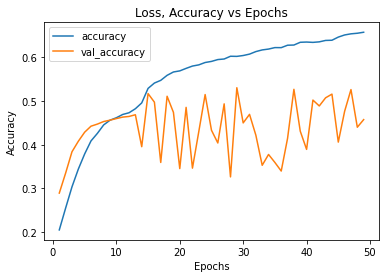

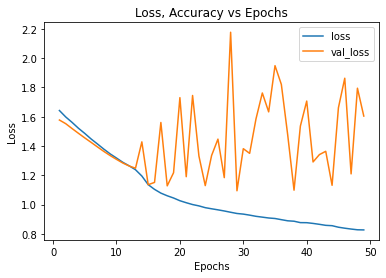

In [ ]:
#plot the learning curves
import matplotlib
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label = 'accuracy')
plt.plot(epochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
!zip -r /content/model11.zip /content/model11

  adding: content/model11/ (stored 0%)
  adding: content/model11/variables/ (stored 0%)
  adding: content/model11/variables/variables.data-00000-of-00001 (deflated 5%)
  adding: content/model11/variables/variables.index (deflated 63%)
  adding: content/model11/assets/ (stored 0%)
  adding: content/model11/fingerprint.pb (stored 0%)
  adding: content/model11/keras_metadata.pb (deflated 89%)
  adding: content/model11/saved_model.pb (deflated 90%)


In [ ]:
from google.colab import files
files.download('/content/model11.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Re-Evaluation

In [ ]:
!unzip -uq "/content/model11.zip" -d "/"

250/250 [==============================] - 5s 14ms/step
[[   0    0   35   46    2]
 [   0    0  156  241    5]
 [   0    0  948 1441   63]
 [   0    1 1415 2173  108]
 [   0    1  538  783   44]]
              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        83
           2     0.0000    0.0000    0.0000       402
           3     0.3066    0.3866    0.3420      2452
           4     0.4639    0.5878    0.5186      3697
           5     0.1982    0.0322    0.0554      1366

    accuracy                         0.3956      8000
   macro avg     0.1937    0.2013    0.1832      8000
weighted avg     0.3422    0.3956    0.3539      8000

(0.395625, 0.395625, 0.395625, None)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


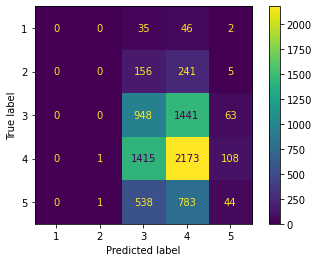

In [ ]:
model = keras.models.load_model("model11")
preds = model.predict(int_test_ds)
preds = np.argmax(preds, axis=1)+1
truths = np.concatenate([y for x, y in int_test_ds.as_numpy_iterator()], axis=0)
truths = np.argmax(truths, axis=1)+1

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay, classification_report

print(confusion_matrix(truths, preds))
print(classification_report(truths, preds, digits=4))
print(precision_recall_fscore_support(truths, preds, average='micro'))

ConfusionMatrixDisplay.from_predictions(truths, preds)

# CNN

## Model Architecture

In [ ]:
import kerastuner as kt

tf.random.set_seed(42)

def build_model(hp):
  # One input is a sequence of integers.
  inputs = Input(shape=(None,), dtype="int64")
  # Encode the integers into binary 20,000-dimensional vectors
  embedded = tf.one_hot(inputs, depth=max_tokens)
  # Add a bidirectional LSTM.
  j = hp.Choice("units", values=[16,64,128])
  k = hp.Choice("dropout", values=[0.1,0.3,0.5])
  for i in range(hp.Int("num_layers", 1, 4)):
    if i == 1:
      x = layers.Conv1D(j, 3, activation="relu")(embedded)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
    elif i == 2:
      x = layers.Conv1D(j, 3, activation="relu")(embedded)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
      x = layers.Conv1D(j, 3, activation="relu")(x)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
    elif i == 3:
      x = layers.Conv1D(j, 3, activation="relu")(embedded)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
      x = layers.Conv1D(j, 3, activation="relu")(x)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
      x = layers.Conv1D(j, 3, activation="relu")(x)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
    else:
      x = layers.Conv1D(j, 3, activation="relu")(embedded)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
      x = layers.Conv1D(j, 3, activation="relu")(x)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
      x = layers.Conv1D(j, 3, activation="relu")(x)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
      x = layers.Conv1D(j, 3, activation="relu")(x)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
  x = layers.GlobalMaxPooling1D()(x)
  # Add a classification Layer
  outputs = Dense(5, activation="softmax")(x)
  model = Model(inputs, outputs)
  model.compile(optimizer="adam",
      loss="categorical_crossentropy",
      metrics=["accuracy"])
  return model

### Search Space

In [ ]:
stop_early = EarlyStopping(monitor='val_loss', patience=3, 
                                  min_delta = 0.001, restore_best_weights = True)

# Instantiate the tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective=kt.Objective("val_loss", direction="min"),
    max_trials=8)

# Display search space summary
tuner.search_space_summary()

Search space summary
Default search space size: 3
units (Choice)
{'default': 16, 'conditions': [], 'values': [16, 64, 128], 'ordered': True}
dropout (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.3, 0.5], 'ordered': True}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}


### Hyperparameter Tuning

In [ ]:
tuner.search(int_train_ds, validation_data=int_val_ds, epochs=10, batch_size=512, callbacks=[stop_early])

Trial 8 Complete [00h 00m 49s]
val_loss: 0.993185818195343

Best val_loss So Far: 0.9798766374588013
Total elapsed time: 00h 06m 24s


### Refit with best Parameter

In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

print(best_hps.get('num_layers')) 
print(best_hps.get('units')) 
print(best_hps.get('dropout'))

2
64
0.1


In [ ]:
# Fit model
model = tuner.hypermodel.build(best_hps)
history = model.fit(int_train_ds, 
                    validation_data=int_val_ds,
                    epochs=100,
                    callbacks=[model_checkpoint_cb2, reduce_lr_cb, early_stopping_cb])

Epoch 1/100
746/751 [============================>.] - ETA: 0s - loss: 1.1603 - accuracy: 0.4979

751/751 [==============================] - 9s 10ms/step - loss: 1.1601 - accuracy: 0.4977 - val_loss: 1.0791 - val_accuracy: 0.5449 - lr: 0.0010
Epoch 2/100
748/751 [============================>.] - ETA: 0s - loss: 1.0010 - accuracy: 0.5703

751/751 [==============================] - 7s 10ms/step - loss: 1.0011 - accuracy: 0.5703 - val_loss: 1.0190 - val_accuracy: 0.5634 - lr: 0.0010
Epoch 3/100
749/751 [============================>.] - ETA: 0s - loss: 0.8703 - accuracy: 0.6406

751/751 [==============================] - 7s 10ms/step - loss: 0.8700 - accuracy: 0.6407 - val_loss: 0.9913 - val_accuracy: 0.5703 - lr: 0.0010
Epoch 4/100
751/751 [==============================] - 7s 9ms/step - loss: 0.7310 - accuracy: 0.7238 - val_loss: 0.9833 - val_accuracy: 0.5643 - lr: 0.0010
Epoch 5/100
751/751 [==============================] - 7s 9ms/step - loss: 0.5856 - accuracy: 0.8054 - val_loss: 0.9904 - val_accuracy: 0.5671 - lr: 0.0010
Epoch 6/100
751/751 [==============================] - 7s 9ms/step - loss: 0.4512 - accuracy: 0.8718 - val_loss: 1.0099 - val_accuracy: 0.5540 - lr: 0.0010
Epoch 7/100
751/751 [==============================] - 7s 9ms/step - loss: 0.3347 - accuracy: 0.9193 - val_loss: 1.0340 - val_accuracy: 0.5478 - lr: 0.0010
Epoch 8/100
751/751 [==============================] - 7s 9ms/step - loss: 0.2407 - accuracy: 0.9525 - val_loss: 1.0676 - val_accuracy: 0.5433 - lr: 0.0010
Epoch 9/100
751/751 [==============================] - 7s 9ms/step - loss: 

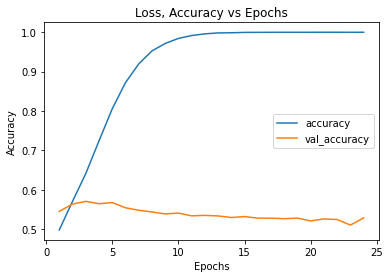

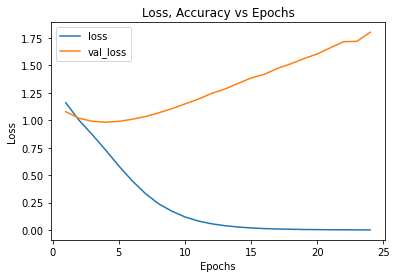

In [ ]:
#plot the learning curves
import matplotlib
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label = 'accuracy')
plt.plot(epochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
!zip -r /content/model2.zip /content/model2

  adding: content/model2/ (stored 0%)
  adding: content/model2/variables/ (stored 0%)
  adding: content/model2/variables/variables.index (deflated 57%)
  adding: content/model2/variables/variables.data-00000-of-00001 (deflated 38%)
  adding: content/model2/fingerprint.pb (stored 0%)
  adding: content/model2/saved_model.pb (deflated 87%)
  adding: content/model2/keras_metadata.pb (deflated 87%)
  adding: content/model2/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download('/content/model2.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Evaluation

In [ ]:
!unzip -uq "/content/model2.zip" -d "/"

250/250 [==============================] - 4s 3ms/step
[[   0    0   20   59    4]
 [   0    0   80  308   14]
 [   0    0  499 1913   40]
 [   0    0  778 2857   62]
 [   0    0  270 1075   21]]
              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        83
           2     0.0000    0.0000    0.0000       402
           3     0.3030    0.2035    0.2435      2452
           4     0.4599    0.7728    0.5766      3697
           5     0.1489    0.0154    0.0279      1366

    accuracy                         0.4221      8000
   macro avg     0.1824    0.1983    0.1696      8000
weighted avg     0.3308    0.4221    0.3459      8000

(0.422125, 0.422125, 0.42212500000000003, None)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


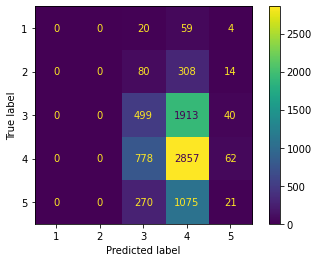

In [ ]:
model = keras.models.load_model("model2")
preds = model.predict(int_test_ds)
preds = np.argmax(preds, axis=1)+1
truths = np.concatenate([y for x, y in int_test_ds.as_numpy_iterator()], axis=0)
truths = np.argmax(truths, axis=1)+1

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay, classification_report

print(confusion_matrix(truths, preds))
print(classification_report(truths, preds, digits=4))
print(precision_recall_fscore_support(truths, preds, average='micro'))

ConfusionMatrixDisplay.from_predictions(truths, preds)

## Add more complexity to layers and reduce learning rate

In [ ]:
tf.random.set_seed(42)

def get_model():
  # One input is a sequence of integers.
  inputs = Input(shape=(None,), dtype="int64")
  # Encode the integers into binary 20,000-dimensional vectors
  embedded = tf.one_hot(inputs, depth=max_tokens)
  x = layers.Conv1D(64, 3, activation="relu", kernel_initializer="he_normal")(embedded)
  x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x = BatchNormalization()(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Conv1D(64, 3, activation="relu", kernel_initializer="he_normal")(x)
  x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x = BatchNormalization()(x)
  x = layers.Dropout(0.1)(x)
  x = layers.GlobalMaxPooling1D()(x)
  # Add a classification Layer
  outputs = Dense(5, activation="softmax")(x)
  model = Model(inputs, outputs)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
      loss="categorical_crossentropy",
      metrics=["accuracy"])
  return model

In [ ]:
model = get_model()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None)]            0         
                                                                 
 tf.one_hot_4 (TFOpLambda)   (None, None, 5000)        0         
                                                                 
 conv1d_11 (Conv1D)          (None, None, 64)          960064    
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, None, 64)         0         
 g1D)                                                            
                                                                 
 batch_normalization_1 (Batc  (None, None, 64)         256       
 hNormalization)                                                 
                                                                 
 dropout_20 (Dropout)        (None, None, 64)          0   

### Refit final model

In [ ]:
history = model.fit(int_train_ds,
          validation_data=int_val_ds,
          epochs=1000,
          callbacks=[model_checkpoint_cb6, reduce_lr_cb, early_stopping_cb])

Epoch 1/1000
751/751 [==============================] - 9s 9ms/step - loss: 1.6205 - accuracy: 0.4010 - val_loss: 1.2624 - val_accuracy: 0.4655 - lr: 1.0000e-04
Epoch 2/1000
751/751 [==============================] - 6s 8ms/step - loss: 1.0298 - accuracy: 0.5642 - val_loss: 1.1997 - val_accuracy: 0.4964 - lr: 1.0000e-04
Epoch 3/1000
751/751 [==============================] - 6s 8ms/step - loss: 0.7796 - accuracy: 0.6888 - val_loss: 1.2266 - val_accuracy: 0.4932 - lr: 1.0000e-04
Epoch 4/1000
751/751 [==============================] - 6s 8ms/step - loss: 0.5436 - accuracy: 0.7969 - val_loss: 1.3069 - val_accuracy: 0.4924 - lr: 1.0000e-04
Epoch 5/1000
751/751 [==============================] - 6s 8ms/step - loss: 0.3499 - accuracy: 0.8783 - val_loss: 1.4191 - val_accuracy: 0.4832 - lr: 1.0000e-04
Epoch 6/1000
751/751 [==============================] - 6s 8ms/step - loss: 0.2447 - accuracy: 0.9163 - val_loss: 1.5207 - val_accuracy: 0.4790 - lr: 1.0000e-04
Epoch 7/1000
751/751 [============

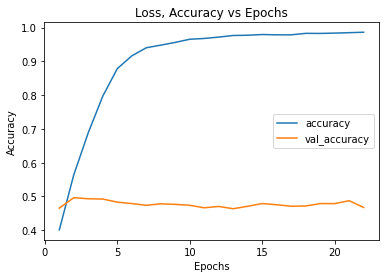

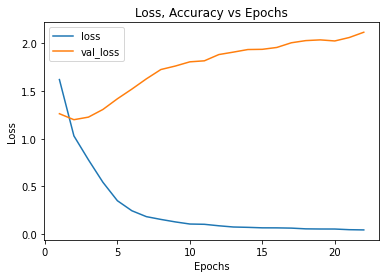

In [ ]:
#plot the learning curves
import matplotlib
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label = 'accuracy')
plt.plot(epochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
!zip -r /content/model6.zip /content/model6

  adding: content/model6/ (stored 0%)
  adding: content/model6/variables/ (stored 0%)
  adding: content/model6/variables/variables.index (deflated 60%)
  adding: content/model6/variables/variables.data-00000-of-00001 (deflated 22%)
  adding: content/model6/fingerprint.pb (stored 0%)
  adding: content/model6/saved_model.pb (deflated 88%)
  adding: content/model6/keras_metadata.pb (deflated 90%)
  adding: content/model6/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download('/content/model6.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Re-Evaluation

In [ ]:
!unzip -uq "/content/model6.zip" -d "/"

250/250 [==============================] - 2s 7ms/step
[[   0    0   17   52   14]
 [   0    0   72  316   14]
 [   0    3  429 1885  135]
 [   0    3  593 2895  206]
 [   0    5  241 1045   75]]
              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        83
           2     0.0000    0.0000    0.0000       402
           3     0.3173    0.1750    0.2256      2452
           4     0.4675    0.7831    0.5854      3697
           5     0.1689    0.0549    0.0829      1366

    accuracy                         0.4249      8000
   macro avg     0.1907    0.2026    0.1788      8000
weighted avg     0.3421    0.4249    0.3538      8000

(0.424875, 0.424875, 0.424875, None)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


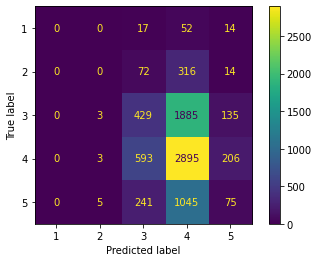

In [ ]:
model = keras.models.load_model("model6")
preds = model.predict(int_test_ds)
preds = np.argmax(preds, axis=1)+1
truths = np.concatenate([y for x, y in int_test_ds.as_numpy_iterator()], axis=0)
truths = np.argmax(truths, axis=1)+1

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay, classification_report

print(confusion_matrix(truths, preds))
print(classification_report(truths, preds, digits=4))
print(precision_recall_fscore_support(truths, preds, average='micro'))

ConfusionMatrixDisplay.from_predictions(truths, preds)

## More reduced learning rate

In [ ]:
tf.random.set_seed(42)

def get_model():
  # One input is a sequence of integers.
  inputs = Input(shape=(None,), dtype="int64")
  # Encode the integers into binary 20,000-dimensional vectors
  embedded = tf.one_hot(inputs, depth=max_tokens)
  x = layers.Conv1D(64, 3, activation="relu", kernel_initializer="he_normal")(embedded)
  x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x = BatchNormalization()(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Conv1D(64, 3, activation="relu", kernel_initializer="he_normal")(x)
  x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x = BatchNormalization()(x)
  x = layers.Dropout(0.1)(x)
  x = layers.GlobalMaxPooling1D()(x)
  # Add a classification Layer
  outputs = Dense(5, activation="softmax")(x)
  model = Model(inputs, outputs)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
      loss="categorical_crossentropy",
      metrics=["accuracy"])
  return model

In [ ]:
model = get_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 tf.one_hot_4 (TFOpLambda)   (None, None, 5000)        0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          960064    
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, None, 64)         256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, None, 64)          0   

### Refit Model

In [ ]:
history = model.fit(int_train_ds,
          validation_data=int_val_ds,
          epochs=1000,
          callbacks=[model_checkpoint_cb12, reduce_lr_cb, early_stopping_cb])

Epoch 1/1000
751/751 [==============================] - ETA: 0s - loss: 2.4119 - accuracy: 0.2675

751/751 [==============================] - 11s 10ms/step - loss: 2.4119 - accuracy: 0.2675 - val_loss: 1.6523 - val_accuracy: 0.3137 - lr: 1.0000e-05
Epoch 2/1000
750/751 [============================>.] - ETA: 0s - loss: 1.6564 - accuracy: 0.3737

751/751 [==============================] - 7s 10ms/step - loss: 1.6564 - accuracy: 0.3737 - val_loss: 1.5302 - val_accuracy: 0.3772 - lr: 1.0000e-05
Epoch 3/1000
751/751 [==============================] - ETA: 0s - loss: 1.4812 - accuracy: 0.4128

751/751 [==============================] - 7s 10ms/step - loss: 1.4812 - accuracy: 0.4128 - val_loss: 1.4476 - val_accuracy: 0.3948 - lr: 1.0000e-05
Epoch 4/1000
743/751 [============================>.] - ETA: 0s - loss: 1.3605 - accuracy: 0.4431

751/751 [==============================] - 7s 10ms/step - loss: 1.3594 - accuracy: 0.4436 - val_loss: 1.3979 - val_accuracy: 0.4082 - lr: 1.0000e-05
Epoch 5/1000
751/751 [==============================] - ETA: 0s - loss: 1.2731 - accuracy: 0.4740

751/751 [==============================] - 8s 11ms/step - loss: 1.2731 - accuracy: 0.4740 - val_loss: 1.3624 - val_accuracy: 0.4154 - lr: 1.0000e-05
Epoch 6/1000
748/751 [============================>.] - ETA: 0s - loss: 1.2019 - accuracy: 0.4959

751/751 [==============================] - 7s 10ms/step - loss: 1.2023 - accuracy: 0.4957 - val_loss: 1.3367 - val_accuracy: 0.4221 - lr: 1.0000e-05
Epoch 7/1000
750/751 [============================>.] - ETA: 0s - loss: 1.1389 - accuracy: 0.5190

751/751 [==============================] - 7s 10ms/step - loss: 1.1390 - accuracy: 0.5190 - val_loss: 1.3176 - val_accuracy: 0.4312 - lr: 1.0000e-05
Epoch 8/1000
743/751 [============================>.] - ETA: 0s - loss: 1.0831 - accuracy: 0.5494

751/751 [==============================] - 7s 10ms/step - loss: 1.0824 - accuracy: 0.5497 - val_loss: 1.3030 - val_accuracy: 0.4367 - lr: 1.0000e-05
Epoch 9/1000
750/751 [============================>.] - ETA: 0s - loss: 1.0196 - accuracy: 0.5790

751/751 [==============================] - 8s 10ms/step - loss: 1.0196 - accuracy: 0.5790 - val_loss: 1.2939 - val_accuracy: 0.4419 - lr: 1.0000e-05
Epoch 10/1000
748/751 [============================>.] - ETA: 0s - loss: 0.9698 - accuracy: 0.5994

751/751 [==============================] - 7s 10ms/step - loss: 0.9702 - accuracy: 0.5992 - val_loss: 1.2872 - val_accuracy: 0.4446 - lr: 1.0000e-05
Epoch 11/1000
749/751 [============================>.] - ETA: 0s - loss: 0.9179 - accuracy: 0.6263

751/751 [==============================] - 7s 10ms/step - loss: 0.9178 - accuracy: 0.6264 - val_loss: 1.2850 - val_accuracy: 0.4474 - lr: 1.0000e-05
Epoch 12/1000
751/751 [==============================] - 6s 8ms/step - loss: 0.8668 - accuracy: 0.6467 - val_loss: 1.2846 - val_accuracy: 0.4474 - lr: 1.0000e-05
Epoch 13/1000
743/751 [============================>.] - ETA: 0s - loss: 0.8167 - accuracy: 0.6783

751/751 [==============================] - 7s 10ms/step - loss: 0.8164 - accuracy: 0.6784 - val_loss: 1.2879 - val_accuracy: 0.4491 - lr: 1.0000e-05
Epoch 14/1000
751/751 [==============================] - 6s 8ms/step - loss: 0.7684 - accuracy: 0.7008 - val_loss: 1.2928 - val_accuracy: 0.4457 - lr: 1.0000e-05
Epoch 15/1000
751/751 [==============================] - 6s 8ms/step - loss: 0.7147 - accuracy: 0.7239 - val_loss: 1.2991 - val_accuracy: 0.4474 - lr: 1.0000e-05
Epoch 16/1000
751/751 [==============================] - 6s 8ms/step - loss: 0.6704 - accuracy: 0.7435 - val_loss: 1.3087 - val_accuracy: 0.4481 - lr: 1.0000e-05
Epoch 17/1000
751/751 [==============================] - ETA: 0s - loss: 0.6186 - accuracy: 0.7705

751/751 [==============================] - 7s 10ms/step - loss: 0.6186 - accuracy: 0.7705 - val_loss: 1.3192 - val_accuracy: 0.4516 - lr: 1.0000e-05
Epoch 18/1000
751/751 [==============================] - 6s 8ms/step - loss: 0.5843 - accuracy: 0.7859 - val_loss: 1.3329 - val_accuracy: 0.4499 - lr: 1.0000e-05
Epoch 19/1000
751/751 [==============================] - 6s 8ms/step - loss: 0.5422 - accuracy: 0.8023 - val_loss: 1.3445 - val_accuracy: 0.4511 - lr: 1.0000e-05
Epoch 20/1000
751/751 [==============================] - 6s 8ms/step - loss: 0.5066 - accuracy: 0.8178 - val_loss: 1.3569 - val_accuracy: 0.4489 - lr: 1.0000e-05
Epoch 21/1000
751/751 [==============================] - 6s 8ms/step - loss: 0.4713 - accuracy: 0.8316 - val_loss: 1.3683 - val_accuracy: 0.4504 - lr: 1.0000e-05
Epoch 22/1000
751/751 [==============================] - 6s 8ms/step - loss: 0.4311 - accuracy: 0.8531 - val_loss: 1.3823 - val_accuracy: 0.4501 - lr: 1.0000e-05
Epoch 23/1000
751/751 [==================

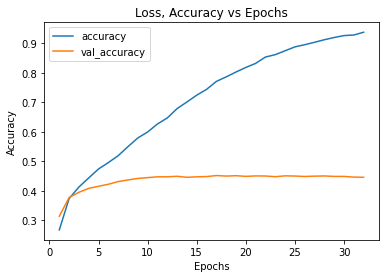

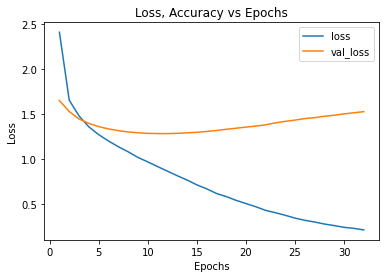

In [ ]:
#plot the learning curves
import matplotlib
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label = 'accuracy')
plt.plot(epochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
!zip -r /content/model12.zip /content/model12

  adding: content/model12/ (stored 0%)
  adding: content/model12/variables/ (stored 0%)
  adding: content/model12/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model12/variables/variables.index (deflated 66%)
  adding: content/model12/assets/ (stored 0%)
  adding: content/model12/fingerprint.pb (stored 0%)
  adding: content/model12/keras_metadata.pb (deflated 91%)
  adding: content/model12/saved_model.pb (deflated 89%)


In [ ]:
from google.colab import files
files.download('/content/model12.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Re-Evaluation

In [ ]:
!unzip -uq "/content/model12.zip" -d "/"

250/250 [==============================] - 1s 3ms/step
[[   0    2   27   44   10]
 [   1    6  107  243   45]
 [   3   34  735 1363  317]
 [   2   63 1090 2047  495]
 [   2   23  433  734  174]]
              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        83
           2     0.0469    0.0149    0.0226       402
           3     0.3073    0.2998    0.3035      2452
           4     0.4620    0.5537    0.5037      3697
           5     0.1671    0.1274    0.1446      1366

    accuracy                         0.3703      8000
   macro avg     0.1967    0.1992    0.1949      8000
weighted avg     0.3386    0.3703    0.3516      8000

(0.37025, 0.37025, 0.37025, None)


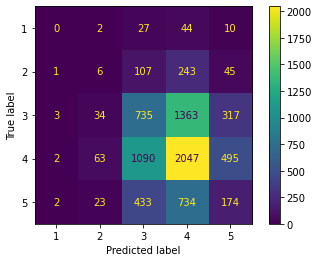

In [ ]:
model = keras.models.load_model("model12")
preds = model.predict(int_test_ds)
preds = np.argmax(preds, axis=1)+1
truths = np.concatenate([y for x, y in int_test_ds.as_numpy_iterator()], axis=0)
truths = np.argmax(truths, axis=1)+1

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay, classification_report

print(confusion_matrix(truths, preds))
print(classification_report(truths, preds, digits=4))
print(precision_recall_fscore_support(truths, preds, average='micro'))

ConfusionMatrixDisplay.from_predictions(truths, preds)

# CRNN

## Model Architecture

In [ ]:
tf.random.set_seed(42)

def build_model(hp):
  # One input is a sequence of integers.
  inputs = Input(shape=(None,), dtype="int64")
  # Encode the integers into binary 20,000-dimensional vectors
  embedded = tf.one_hot(inputs, depth=max_tokens)
  
  j = hp.Choice("conv_units", values=[16,64,128])
  k = hp.Choice("conv_dropout", values=[0.1,0.3,0.5])
  for i in range(hp.Int("num_conv_layers", 1, 4)):
    if i == 1:
      x = layers.Conv1D(j, 3, activation="relu")(embedded)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
    elif i == 2:
      x = layers.Conv1D(j, 3, activation="relu")(embedded)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
      x = layers.Conv1D(j, 3, activation="relu")(x)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
    elif i == 3:
      x = layers.Conv1D(j, 3, activation="relu")(embedded)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
      x = layers.Conv1D(j, 3, activation="relu")(x)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
      x = layers.Conv1D(j, 3, activation="relu")(x)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
    else:
      x = layers.Conv1D(j, 3, activation="relu")(embedded)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
      x = layers.Conv1D(j, 3, activation="relu")(x)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
      x = layers.Conv1D(j, 3, activation="relu")(x)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
      x = layers.Conv1D(j, 3, activation="relu")(x)
      x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
      x = layers.Dropout(k)(x)
  #x = layers.GlobalMaxPooling1D()(x)

  a = hp.Choice("bilstm_units", values=[16,64,128])
  b = hp.Choice("bilstm_dropout", values=[0.1,0.3,0.5])
  for c in range(hp.Int("num_bilstm_layers", 1, 4)):
    if c == 1:
      x = Bidirectional(LSTM(units=a))(x)
      x = Dropout(b)(x)
    elif c == 2:
      x = Bidirectional(LSTM(units=a, return_sequences=True))(x)
      x = Dropout(b)(x)
      x = Bidirectional(LSTM(units=a))(x)
      x = Dropout(b)(x)
    elif c == 3:
      x = Bidirectional(LSTM(units=a, return_sequences=True))(x)
      x = Dropout(b)(x)
      x = Bidirectional(LSTM(units=a, return_sequences=True))(x)
      x = Dropout(b)(x)
      x = Bidirectional(LSTM(units=a))(x)
      x = Dropout(b)(x)
    else:
      x = Bidirectional(LSTM(units=a, return_sequences=True))(x)
      x = Dropout(b)(x)
      x = Bidirectional(LSTM(units=a, return_sequences=True))(x)
      x = Dropout(b)(x)
      x = Bidirectional(LSTM(units=a, return_sequences=True))(x)
      x = Dropout(b)(x)
      x = Bidirectional(LSTM(units=a))(x)
      x = Dropout(b)(x)

  # Add a classification Layer
  outputs = Dense(5, activation="softmax")(x)
  model = Model(inputs, outputs)
  model.compile(optimizer="adam",
      loss="categorical_crossentropy",
      metrics="accuracy")
  return model

### Search Space

In [ ]:
stop_early = EarlyStopping(monitor='val_loss', patience=3, 
                                  min_delta = 0.001, restore_best_weights = True)

# Instantiate the tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective=kt.Objective("val_loss", direction="min"),
    max_trials=8)

# Display search space summary
tuner.search_space_summary()

Search space summary
Default search space size: 6
conv_units (Choice)
{'default': 16, 'conditions': [], 'values': [16, 64, 128], 'ordered': True}
conv_dropout (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.3, 0.5], 'ordered': True}
num_conv_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
bilstm_units (Choice)
{'default': 16, 'conditions': [], 'values': [16, 64, 128], 'ordered': True}
bilstm_dropout (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.3, 0.5], 'ordered': True}
num_bilstm_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}


### Hyperparameter Tuning

In [ ]:
tuner.search(int_train_ds, validation_data=int_val_ds, epochs=10, batch_size=512, callbacks=[stop_early])

### Refit with best Parameter

In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

print(best_hps.get('num_conv_layers')) 
print(best_hps.get('conv_units')) 
print(best_hps.get('conv_dropout'))
print(best_hps.get('num_bilstm_layers')) 
print(best_hps.get('bilstm_units')) 
print(best_hps.get('bilstm_dropout'))

3
128
0.1
1
64
0.1


In [ ]:
# Fit model
model = tuner.hypermodel.build(best_hps)
history = model.fit(int_train_ds, 
                    validation_data=int_val_ds,
                    epochs=100,
                    callbacks=[model_checkpoint_cb3, reduce_lr_cb, early_stopping_cb])

Epoch 1/100
751/751 [==============================] - ETA: 0s - loss: 1.1820 - accuracy: 0.4769

751/751 [==============================] - 87s 101ms/step - loss: 1.1820 - accuracy: 0.4769 - val_loss: 1.1200 - val_accuracy: 0.4909 - lr: 0.0010
Epoch 2/100
751/751 [==============================] - ETA: 0s - loss: 1.0249 - accuracy: 0.5501

751/751 [==============================] - 74s 98ms/step - loss: 1.0249 - accuracy: 0.5501 - val_loss: 1.0180 - val_accuracy: 0.5601 - lr: 0.0010
Epoch 3/100
751/751 [==============================] - 30s 40ms/step - loss: 0.8589 - accuracy: 0.6258 - val_loss: 1.0950 - val_accuracy: 0.5523 - lr: 0.0010
Epoch 4/100
751/751 [==============================] - 30s 40ms/step - loss: 0.6435 - accuracy: 0.7404 - val_loss: 1.4237 - val_accuracy: 0.5056 - lr: 0.0010
Epoch 5/100
751/751 [==============================] - 30s 40ms/step - loss: 0.4248 - accuracy: 0.8450 - val_loss: 1.6797 - val_accuracy: 0.5419 - lr: 0.0010
Epoch 6/100
751/751 [==============================] - 30s 40ms/step - loss: 0.2816 - accuracy: 0.9030 - val_loss: 1.8413 - val_accuracy: 0.5463 - lr: 0.0010
Epoch 7/100
751/751 [==============================] - 30s 40ms/step - loss: 0.2037 - accuracy: 0.9336 - val_loss: 1.9897 - val_accuracy: 0.5340 - lr: 0.0010
Epoch 8/100
751/751 [==============================] - 30s 40ms/

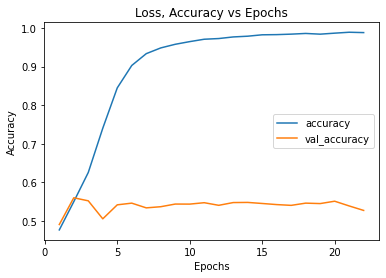

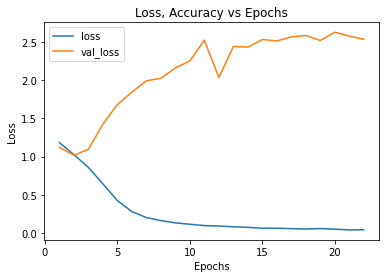

In [ ]:
#plot the learning curves
import matplotlib
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label = 'accuracy')
plt.plot(epochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
!zip -r /content/model3.zip /content/model3

  adding: content/model3/ (stored 0%)
  adding: content/model3/variables/ (stored 0%)
  adding: content/model3/variables/variables.index (deflated 72%)
  adding: content/model3/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/model3/fingerprint.pb (stored 0%)
  adding: content/model3/saved_model.pb (deflated 91%)
  adding: content/model3/keras_metadata.pb (deflated 94%)
  adding: content/model3/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download('/content/model3.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Evaluation

In [ ]:
!unzip -uq "/content/model3.zip" -d "/"

250/250 [==============================] - 15s 17ms/step
[[   0    0   27   55    1]
 [   0    0  120  281    1]
 [   0    0  752 1691    9]
 [   0    0 1149 2517   31]
 [   0    0  429  922   15]]
              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        83
           2     0.0000    0.0000    0.0000       402
           3     0.3036    0.3067    0.3051      2452
           4     0.4605    0.6808    0.5494      3697
           5     0.2632    0.0110    0.0211      1366

    accuracy                         0.4105      8000
   macro avg     0.2054    0.1997    0.1751      8000
weighted avg     0.3508    0.4105    0.3510      8000

(0.4105, 0.4105, 0.4105, None)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


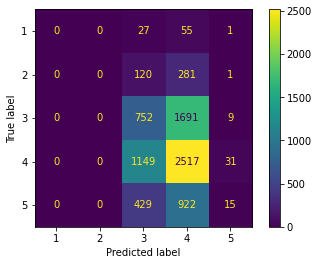

In [ ]:
model = keras.models.load_model("model3")
preds = model.predict(int_test_ds)
preds = np.argmax(preds, axis=1)+1
truths = np.concatenate([y for x, y in int_test_ds.as_numpy_iterator()], axis=0)
truths = np.argmax(truths, axis=1)+1

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay, classification_report

print(confusion_matrix(truths, preds))
print(classification_report(truths, preds, digits=4))
print(precision_recall_fscore_support(truths, preds, average='micro'))

ConfusionMatrixDisplay.from_predictions(truths, preds)

## Add more complexity and reduce learning rate

In [ ]:
tf.random.set_seed(42)

def get_model():
  # One input is a sequence of integers.
  inputs = Input(shape=(None,), dtype="int64")
  # Encode the integers into binary 20,000-dimensional vectors
  embedded = tf.one_hot(inputs, depth=max_tokens)
  x = layers.Conv1D(128, 3, activation="relu", kernel_initializer="he_normal")(embedded)
  x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x = BatchNormalization()(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Conv1D(128, 3, activation="relu", kernel_initializer="he_normal")(x)
  x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x = BatchNormalization()(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Conv1D(128, 3, activation="relu", kernel_initializer="he_normal")(x)
  x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x = BatchNormalization()(x)
  x = layers.Dropout(0.1)(x)
  
  x = Bidirectional(LSTM(units=64, activation="tanh", kernel_initializer="he_normal"))(x)
  x = BatchNormalization()(x)
  x = Dropout(0.5)(x)
  # Add a classification Layer
  outputs = Dense(5, activation="softmax")(x)
  model = Model(inputs, outputs)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
      loss="categorical_crossentropy",
      metrics=["accuracy"])
  return model

In [ ]:
model = get_model()
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, None)]            0         
                                                                 
 tf.one_hot_8 (TFOpLambda)   (None, None, 5000)        0         
                                                                 
 conv1d_17 (Conv1D)          (None, None, 128)         1920128   
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, None, 128)        0         
 g1D)                                                            
                                                                 
 batch_normalization_10 (Bat  (None, None, 128)        512       
 chNormalization)                                                
                                                                 
 dropout_29 (Dropout)        (None, None, 128)         0   

### Refit model

In [ ]:
history = model.fit(int_train_ds,
          validation_data=int_val_ds,
          epochs=1000,
          callbacks=[model_checkpoint_cb7, reduce_lr_cb, early_stopping_cb])

Epoch 1/1000
751/751 [==============================] - ETA: 0s - loss: 2.2421 - accuracy: 0.2397

751/751 [==============================] - 31s 33ms/step - loss: 2.2421 - accuracy: 0.2397 - val_loss: 1.7688 - val_accuracy: 0.3192 - lr: 1.0000e-04
Epoch 2/1000
751/751 [==============================] - ETA: 0s - loss: 1.7548 - accuracy: 0.3413

751/751 [==============================] - 26s 34ms/step - loss: 1.7548 - accuracy: 0.3413 - val_loss: 1.5763 - val_accuracy: 0.3231 - lr: 1.0000e-04
Epoch 3/1000
749/751 [============================>.] - ETA: 0s - loss: 1.4785 - accuracy: 0.4236

751/751 [==============================] - 24s 31ms/step - loss: 1.4783 - accuracy: 0.4236 - val_loss: 1.2759 - val_accuracy: 0.4560 - lr: 1.0000e-04
Epoch 4/1000
751/751 [==============================] - ETA: 0s - loss: 1.2744 - accuracy: 0.4960

751/751 [==============================] - 26s 34ms/step - loss: 1.2744 - accuracy: 0.4960 - val_loss: 1.2191 - val_accuracy: 0.4739 - lr: 1.0000e-04
Epoch 5/1000
748/751 [============================>.] - ETA: 0s - loss: 1.1291 - accuracy: 0.5537

751/751 [==============================] - 24s 32ms/step - loss: 1.1293 - accuracy: 0.5535 - val_loss: 1.1773 - val_accuracy: 0.5039 - lr: 1.0000e-04
Epoch 6/1000
748/751 [============================>.] - ETA: 0s - loss: 0.9943 - accuracy: 0.6105

751/751 [==============================] - 23s 31ms/step - loss: 0.9941 - accuracy: 0.6107 - val_loss: 1.1810 - val_accuracy: 0.5159 - lr: 1.0000e-04
Epoch 7/1000
748/751 [============================>.] - ETA: 0s - loss: 0.8629 - accuracy: 0.6628

751/751 [==============================] - 26s 34ms/step - loss: 0.8626 - accuracy: 0.6630 - val_loss: 1.2111 - val_accuracy: 0.5225 - lr: 1.0000e-04
Epoch 8/1000
751/751 [==============================] - 11s 15ms/step - loss: 0.7322 - accuracy: 0.7203 - val_loss: 1.3140 - val_accuracy: 0.5024 - lr: 1.0000e-04
Epoch 9/1000
751/751 [==============================] - 11s 15ms/step - loss: 0.5973 - accuracy: 0.7773 - val_loss: 1.4065 - val_accuracy: 0.4979 - lr: 1.0000e-04
Epoch 10/1000
751/751 [==============================] - 11s 15ms/step - loss: 0.4853 - accuracy: 0.8221 - val_loss: 1.5727 - val_accuracy: 0.4866 - lr: 1.0000e-04
Epoch 11/1000
751/751 [==============================] - 11s 15ms/step - loss: 0.3941 - accuracy: 0.8602 - val_loss: 1.8008 - val_accuracy: 0.4665 - lr: 1.0000e-04
Epoch 12/1000
751/751 [==============================] - 11s 15ms/step - loss: 0.3237 - accuracy: 0.8872 - val_loss: 1.8122 - val_accuracy: 0.4765 - lr: 1.0000e-04
Epoch 13/1000
751/751 [=========

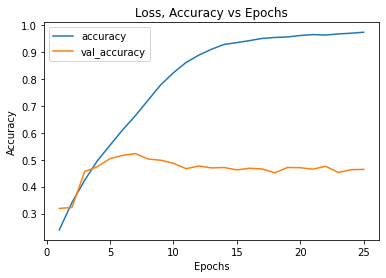

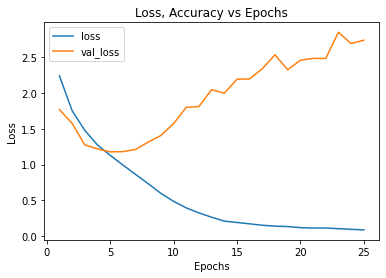

In [ ]:
#plot the learning curves
import matplotlib
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label = 'accuracy')
plt.plot(epochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
!zip -r /content/model7.zip /content/model7

  adding: content/model7/ (stored 0%)
  adding: content/model7/variables/ (stored 0%)
  adding: content/model7/variables/variables.index (deflated 71%)
  adding: content/model7/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model7/fingerprint.pb (stored 0%)
  adding: content/model7/saved_model.pb (deflated 90%)
  adding: content/model7/keras_metadata.pb (deflated 93%)
  adding: content/model7/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download('/content/model7.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Re-Evaluation

In [ ]:
!unzip -uq "/content/model7.zip" -d "/"

250/250 [==============================] - 2s 4ms/step
[[   0    0   27   52    4]
 [   0    0  141  244   17]
 [   0    3  887 1462  100]
 [   0    7 1267 2244  179]
 [   0    2  487  814   63]]
              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        83
           2     0.0000    0.0000    0.0000       402
           3     0.3158    0.3617    0.3372      2452
           4     0.4659    0.6070    0.5272      3697
           5     0.1736    0.0461    0.0729      1366

    accuracy                         0.3992      8000
   macro avg     0.1911    0.2030    0.1875      8000
weighted avg     0.3417    0.3992    0.3594      8000

(0.39925, 0.39925, 0.39924999999999994, None)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


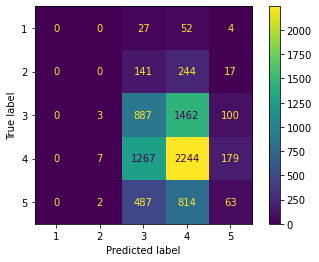

In [ ]:
model = keras.models.load_model("model7")
preds = model.predict(int_test_ds)
preds = np.argmax(preds, axis=1)+1
truths = np.concatenate([y for x, y in int_test_ds.as_numpy_iterator()], axis=0)
truths = np.argmax(truths, axis=1)+1

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay, classification_report

print(confusion_matrix(truths, preds))
print(classification_report(truths, preds, digits=4))
print(precision_recall_fscore_support(truths, preds, average='micro'))

ConfusionMatrixDisplay.from_predictions(truths, preds)

## More reduced learning rate

In [ ]:
tf.random.set_seed(42)

def get_model():
  # One input is a sequence of integers.
  inputs = Input(shape=(None,), dtype="int64")
  # Encode the integers into binary 20,000-dimensional vectors
  embedded = tf.one_hot(inputs, depth=max_tokens)
  x = layers.Conv1D(128, 3, activation="relu", kernel_initializer="he_normal")(embedded)
  x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x = BatchNormalization()(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Conv1D(128, 3, activation="relu", kernel_initializer="he_normal")(x)
  x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x = BatchNormalization()(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Conv1D(128, 3, activation="relu", kernel_initializer="he_normal")(x)
  x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x = BatchNormalization()(x)
  x = layers.Dropout(0.1)(x)
  
  x = Bidirectional(LSTM(units=64, activation="tanh", kernel_initializer="he_normal"))(x)
  x = BatchNormalization()(x)
  x = Dropout(0.5)(x)
  # Add a classification Layer
  outputs = Dense(5, activation="softmax")(x)
  model = Model(inputs, outputs)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
      loss="categorical_crossentropy",
      metrics=["accuracy"])
  return model

In [ ]:
model = get_model()
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, None)]            0         
                                                                 
 tf.one_hot_9 (TFOpLambda)   (None, None, 5000)        0         
                                                                 
 conv1d_20 (Conv1D)          (None, None, 128)         1920128   
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, None, 128)        0         
 g1D)                                                            
                                                                 
 batch_normalization_14 (Bat  (None, None, 128)        512       
 chNormalization)                                                
                                                                 
 dropout_33 (Dropout)        (None, None, 128)         0   

### Refit final model

In [ ]:
history = model.fit(int_train_ds,
          validation_data=int_val_ds,
          epochs=1000,
          callbacks=[model_checkpoint_cb9, reduce_lr_cb, early_stopping_cb])

Epoch 1/1000
751/751 [==============================] - ETA: 0s - loss: 2.6717 - accuracy: 0.1992

751/751 [==============================] - 34s 37ms/step - loss: 2.6717 - accuracy: 0.1992 - val_loss: 1.8496 - val_accuracy: 0.3823 - lr: 1.0000e-05
Epoch 2/1000
751/751 [==============================] - 12s 15ms/step - loss: 2.5209 - accuracy: 0.2100 - val_loss: 1.9602 - val_accuracy: 0.2202 - lr: 1.0000e-05
Epoch 3/1000
751/751 [==============================] - 12s 16ms/step - loss: 2.4186 - accuracy: 0.2211 - val_loss: 1.8759 - val_accuracy: 0.3057 - lr: 1.0000e-05
Epoch 4/1000
751/751 [==============================] - 12s 15ms/step - loss: 2.3262 - accuracy: 0.2294 - val_loss: 1.9440 - val_accuracy: 0.2433 - lr: 1.0000e-05
Epoch 5/1000
751/751 [==============================] - 12s 16ms/step - loss: 2.2431 - accuracy: 0.2407 - val_loss: 1.8406 - val_accuracy: 0.2396 - lr: 1.0000e-05
Epoch 6/1000
751/751 [==============================] - 11s 15ms/step - loss: 2.1657 - accuracy: 0.2538 - val_loss: 1.8932 - val_accuracy: 0.2228 - lr: 1.0000e-05
Epoch 7/1000
751/751 [=============

751/751 [==============================] - 23s 31ms/step - loss: 1.5770 - accuracy: 0.3903 - val_loss: 1.4230 - val_accuracy: 0.3907 - lr: 1.0000e-05
Epoch 18/1000
748/751 [============================>.] - ETA: 0s - loss: 1.5129 - accuracy: 0.4060

751/751 [==============================] - 26s 34ms/step - loss: 1.5134 - accuracy: 0.4054 - val_loss: 1.3912 - val_accuracy: 0.4107 - lr: 1.0000e-05
Epoch 19/1000
748/751 [============================>.] - ETA: 0s - loss: 1.4832 - accuracy: 0.4195

751/751 [==============================] - 23s 31ms/step - loss: 1.4831 - accuracy: 0.4194 - val_loss: 1.3869 - val_accuracy: 0.4130 - lr: 1.0000e-05
Epoch 20/1000
749/751 [============================>.] - ETA: 0s - loss: 1.4422 - accuracy: 0.4342

751/751 [==============================] - 26s 35ms/step - loss: 1.4424 - accuracy: 0.4342 - val_loss: 1.3569 - val_accuracy: 0.4226 - lr: 1.0000e-05
Epoch 21/1000
748/751 [============================>.] - ETA: 0s - loss: 1.4269 - accuracy: 0.4395

751/751 [==============================] - 24s 32ms/step - loss: 1.4268 - accuracy: 0.4395 - val_loss: 1.3471 - val_accuracy: 0.4265 - lr: 1.0000e-05
Epoch 22/1000
748/751 [============================>.] - ETA: 0s - loss: 1.3673 - accuracy: 0.4568

751/751 [==============================] - 27s 36ms/step - loss: 1.3676 - accuracy: 0.4567 - val_loss: 1.3359 - val_accuracy: 0.4341 - lr: 1.0000e-05
Epoch 23/1000
748/751 [============================>.] - ETA: 0s - loss: 1.3469 - accuracy: 0.4663

751/751 [==============================] - 24s 32ms/step - loss: 1.3470 - accuracy: 0.4663 - val_loss: 1.3234 - val_accuracy: 0.4416 - lr: 1.0000e-05
Epoch 24/1000
749/751 [============================>.] - ETA: 0s - loss: 1.3107 - accuracy: 0.4856

751/751 [==============================] - 24s 32ms/step - loss: 1.3107 - accuracy: 0.4857 - val_loss: 1.3086 - val_accuracy: 0.4459 - lr: 1.0000e-05
Epoch 25/1000
749/751 [============================>.] - ETA: 0s - loss: 1.2830 - accuracy: 0.4872

751/751 [==============================] - 27s 36ms/step - loss: 1.2827 - accuracy: 0.4873 - val_loss: 1.2954 - val_accuracy: 0.4519 - lr: 1.0000e-05
Epoch 26/1000
748/751 [============================>.] - ETA: 0s - loss: 1.2613 - accuracy: 0.4991

751/751 [==============================] - 24s 32ms/step - loss: 1.2615 - accuracy: 0.4990 - val_loss: 1.2853 - val_accuracy: 0.4615 - lr: 1.0000e-05
Epoch 27/1000
751/751 [==============================] - 12s 15ms/step - loss: 1.2288 - accuracy: 0.5160 - val_loss: 1.2831 - val_accuracy: 0.4604 - lr: 1.0000e-05
Epoch 28/1000
748/751 [============================>.] - ETA: 0s - loss: 1.2087 - accuracy: 0.5219

751/751 [==============================] - 26s 35ms/step - loss: 1.2092 - accuracy: 0.5219 - val_loss: 1.2750 - val_accuracy: 0.4619 - lr: 1.0000e-05
Epoch 29/1000
748/751 [============================>.] - ETA: 0s - loss: 1.1856 - accuracy: 0.5313

751/751 [==============================] - 24s 32ms/step - loss: 1.1854 - accuracy: 0.5312 - val_loss: 1.2696 - val_accuracy: 0.4680 - lr: 1.0000e-05
Epoch 30/1000
748/751 [============================>.] - ETA: 0s - loss: 1.1498 - accuracy: 0.5534

751/751 [==============================] - 24s 32ms/step - loss: 1.1496 - accuracy: 0.5536 - val_loss: 1.2639 - val_accuracy: 0.4702 - lr: 1.0000e-05
Epoch 31/1000
750/751 [============================>.] - ETA: 0s - loss: 1.1252 - accuracy: 0.5499

751/751 [==============================] - 27s 36ms/step - loss: 1.1252 - accuracy: 0.5499 - val_loss: 1.2537 - val_accuracy: 0.4726 - lr: 1.0000e-05
Epoch 32/1000
749/751 [============================>.] - ETA: 0s - loss: 1.1056 - accuracy: 0.5625

751/751 [==============================] - 23s 31ms/step - loss: 1.1063 - accuracy: 0.5622 - val_loss: 1.2517 - val_accuracy: 0.4780 - lr: 1.0000e-05
Epoch 33/1000
751/751 [==============================] - 11s 15ms/step - loss: 1.0824 - accuracy: 0.5757 - val_loss: 1.2572 - val_accuracy: 0.4735 - lr: 1.0000e-05
Epoch 34/1000
749/751 [============================>.] - ETA: 0s - loss: 1.0562 - accuracy: 0.5838

751/751 [==============================] - 26s 34ms/step - loss: 1.0564 - accuracy: 0.5837 - val_loss: 1.2562 - val_accuracy: 0.4786 - lr: 1.0000e-05
Epoch 35/1000
751/751 [==============================] - 11s 15ms/step - loss: 1.0340 - accuracy: 0.6003 - val_loss: 1.2556 - val_accuracy: 0.4777 - lr: 1.0000e-05
Epoch 36/1000
751/751 [==============================] - 11s 15ms/step - loss: 1.0095 - accuracy: 0.6068 - val_loss: 1.2626 - val_accuracy: 0.4759 - lr: 1.0000e-05
Epoch 37/1000
751/751 [==============================] - 11s 15ms/step - loss: 0.9933 - accuracy: 0.6174 - val_loss: 1.2667 - val_accuracy: 0.4756 - lr: 1.0000e-05
Epoch 38/1000
748/751 [============================>.] - ETA: 0s - loss: 0.9654 - accuracy: 0.6262

751/751 [==============================] - 23s 31ms/step - loss: 0.9651 - accuracy: 0.6262 - val_loss: 1.2530 - val_accuracy: 0.4809 - lr: 1.0000e-05
Epoch 39/1000
748/751 [============================>.] - ETA: 0s - loss: 0.9453 - accuracy: 0.6293

751/751 [==============================] - 26s 35ms/step - loss: 0.9452 - accuracy: 0.6294 - val_loss: 1.2614 - val_accuracy: 0.4826 - lr: 1.0000e-05
Epoch 40/1000
749/751 [============================>.] - ETA: 0s - loss: 0.9285 - accuracy: 0.6383

751/751 [==============================] - 24s 32ms/step - loss: 0.9286 - accuracy: 0.6381 - val_loss: 1.2614 - val_accuracy: 0.4842 - lr: 1.0000e-05
Epoch 41/1000
751/751 [==============================] - 12s 15ms/step - loss: 0.9006 - accuracy: 0.6536 - val_loss: 1.2758 - val_accuracy: 0.4801 - lr: 1.0000e-05
Epoch 42/1000
748/751 [============================>.] - ETA: 0s - loss: 0.8811 - accuracy: 0.6614

751/751 [==============================] - 24s 31ms/step - loss: 0.8808 - accuracy: 0.6614 - val_loss: 1.2810 - val_accuracy: 0.4856 - lr: 1.0000e-05
Epoch 43/1000
751/751 [==============================] - 12s 15ms/step - loss: 0.8576 - accuracy: 0.6726 - val_loss: 1.3116 - val_accuracy: 0.4762 - lr: 1.0000e-05
Epoch 44/1000
751/751 [==============================] - 11s 15ms/step - loss: 0.8366 - accuracy: 0.6800 - val_loss: 1.3070 - val_accuracy: 0.4809 - lr: 1.0000e-05
Epoch 45/1000
751/751 [==============================] - 11s 15ms/step - loss: 0.8249 - accuracy: 0.6875 - val_loss: 1.2965 - val_accuracy: 0.4826 - lr: 1.0000e-05
Epoch 46/1000
751/751 [==============================] - 11s 15ms/step - loss: 0.7915 - accuracy: 0.7011 - val_loss: 1.3200 - val_accuracy: 0.4819 - lr: 1.0000e-05
Epoch 47/1000
751/751 [==============================] - 11s 15ms/step - loss: 0.7627 - accuracy: 0.7122 - val_loss: 1.3263 - val_accuracy: 0.4805 - lr: 1.0000e-05
Epoch 48/1000
751/751 [=======

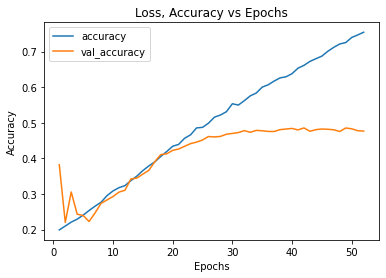

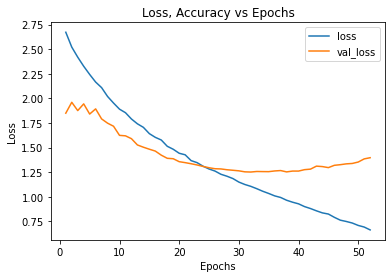

In [ ]:
#plot the learning curves
import matplotlib
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label = 'accuracy')
plt.plot(epochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
!zip -r /content/model9.zip /content/model9

  adding: content/model9/ (stored 0%)
  adding: content/model9/variables/ (stored 0%)
  adding: content/model9/variables/variables.index (deflated 71%)
  adding: content/model9/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model9/fingerprint.pb (stored 0%)
  adding: content/model9/saved_model.pb (deflated 90%)
  adding: content/model9/keras_metadata.pb (deflated 93%)
  adding: content/model9/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download('/content/model9.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Re-Evaluation

In [ ]:
!unzip -uq "/content/model9.zip" -d "/"

250/250 [==============================] - 2s 5ms/step
[[   0    0   18   57    8]
 [   0    0   63  294   45]
 [   1    2  305 1805  339]
 [   1    2  468 2724  502]
 [   0    1  164 1024  177]]
              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        83
           2     0.0000    0.0000    0.0000       402
           3     0.2996    0.1244    0.1758      2452
           4     0.4614    0.7368    0.5674      3697
           5     0.1653    0.1296    0.1453      1366

    accuracy                         0.4007      8000
   macro avg     0.1853    0.1982    0.1777      8000
weighted avg     0.3333    0.4007    0.3409      8000

(0.40075, 0.40075, 0.40075, None)


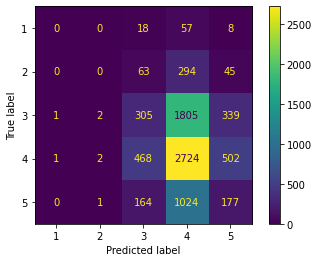

In [ ]:
model = keras.models.load_model("model9")
preds = model.predict(int_test_ds)
preds = np.argmax(preds, axis=1)+1
truths = np.concatenate([y for x, y in int_test_ds.as_numpy_iterator()], axis=0)
truths = np.argmax(truths, axis=1)+1

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay, classification_report

print(confusion_matrix(truths, preds))
print(classification_report(truths, preds, digits=4))
print(precision_recall_fscore_support(truths, preds, average='micro'))

ConfusionMatrixDisplay.from_predictions(truths, preds)

# Combined Model

## Model Architecture

In [ ]:
tf.random.set_seed(42)

def get_model():
  # One input is a sequence of integers.
  inputs = Input(shape=(None,), dtype="int64")
  # Encode the integers into binary 20,000-dimensional vectors
  embedded = tf.one_hot(inputs, depth=max_tokens)
  x = layers.Conv1D(64, 3, activation="relu")(embedded)
  x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Conv1D(64, 3, activation="relu")(x)
  x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x = layers.Dropout(0.1)(x)

  x = Bidirectional(LSTM(units=64))(x)
  x = Dropout(0.5)(x)
  # Add a classification Layer
  outputs = Dense(5, activation="softmax")(x)
  model = Model(inputs, outputs)
  model.compile(optimizer="adam",
      loss="categorical_crossentropy",
      metrics=["accuracy"])
  return model

In [ ]:
model = get_model()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 tf.one_hot_2 (TFOpLambda)   (None, None, 5000)        0         
                                                                 
 conv1d_15 (Conv1D)          (None, None, 64)          960064    
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, None, 64)         0         
 g1D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, None, 64)          0         
                                                                 
 conv1d_16 (Conv1D)          (None, None, 64)          12352     
                                                           

### Fit Model

In [ ]:
history = model.fit(int_train_ds,
          validation_data=int_val_ds,
          epochs=1000,
          callbacks=[model_checkpoint_cb4, reduce_lr_cb, early_stopping_cb])

Epoch 1/1000
749/751 [============================>.] - ETA: 0s - loss: 1.1618 - accuracy: 0.4833

751/751 [==============================] - 31s 34ms/step - loss: 1.1615 - accuracy: 0.4835 - val_loss: 1.0821 - val_accuracy: 0.5094 - lr: 0.0010
Epoch 2/1000
748/751 [============================>.] - ETA: 0s - loss: 0.9628 - accuracy: 0.5693

751/751 [==============================] - 25s 33ms/step - loss: 0.9623 - accuracy: 0.5695 - val_loss: 0.9756 - val_accuracy: 0.5654 - lr: 0.0010
Epoch 3/1000
751/751 [==============================] - 14s 18ms/step - loss: 0.7956 - accuracy: 0.6562 - val_loss: 1.2003 - val_accuracy: 0.4992 - lr: 0.0010
Epoch 4/1000
751/751 [==============================] - 14s 19ms/step - loss: 0.6070 - accuracy: 0.7571 - val_loss: 1.2481 - val_accuracy: 0.5294 - lr: 0.0010
Epoch 5/1000
751/751 [==============================] - 14s 18ms/step - loss: 0.3979 - accuracy: 0.8548 - val_loss: 1.5929 - val_accuracy: 0.5391 - lr: 0.0010
Epoch 6/1000
751/751 [==============================] - 13s 18ms/step - loss: 0.2590 - accuracy: 0.9104 - val_loss: 1.9404 - val_accuracy: 0.5228 - lr: 0.0010
Epoch 7/1000
751/751 [==============================] - 14s 18ms/step - loss: 0.1798 - accuracy: 0.9414 - val_loss: 2.1563 - val_accuracy: 0.5344 - lr: 0.0010
Epoch 8/1000
751/751 [==============================] - 13s

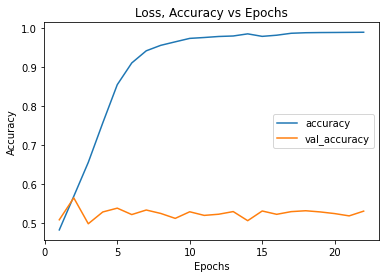

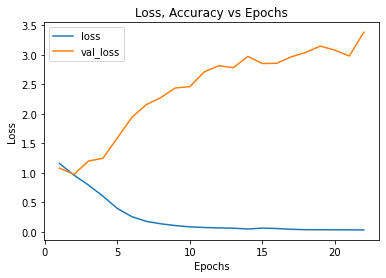

In [ ]:
#plot the learning curves
import matplotlib
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label = 'accuracy')
plt.plot(epochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
!zip -r /content/model4.zip /content/model4

  adding: content/model4/ (stored 0%)
  adding: content/model4/variables/ (stored 0%)
  adding: content/model4/variables/variables.index (deflated 65%)
  adding: content/model4/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/model4/fingerprint.pb (stored 0%)
  adding: content/model4/saved_model.pb (deflated 90%)
  adding: content/model4/keras_metadata.pb (deflated 91%)
  adding: content/model4/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download('/content/model4.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Evaluation

In [ ]:
!unzip -uq "/content/model4.zip" -d "/"

250/250 [==============================] - 2s 5ms/step
[[   0    1   20   60    2]
 [   0    4   96  289   13]
 [   1   15  601 1787   48]
 [   1   24  899 2686   87]
 [   1    7  336  994   28]]
              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        83
           2     0.0784    0.0100    0.0177       402
           3     0.3079    0.2451    0.2729      2452
           4     0.4618    0.7265    0.5647      3697
           5     0.1573    0.0205    0.0363      1366

    accuracy                         0.4149      8000
   macro avg     0.2011    0.2004    0.1783      8000
weighted avg     0.3386    0.4149    0.3517      8000

(0.414875, 0.414875, 0.414875, None)


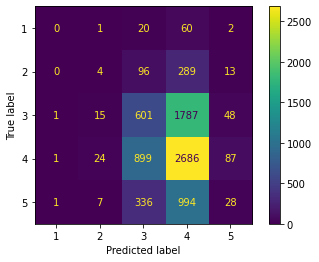

In [ ]:
model = keras.models.load_model("model4")
preds = model.predict(int_test_ds)
preds = np.argmax(preds, axis=1)+1
truths = np.concatenate([y for x, y in int_test_ds.as_numpy_iterator()], axis=0)
truths = np.argmax(truths, axis=1)+1

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay, classification_report

print(confusion_matrix(truths, preds))
print(classification_report(truths, preds, digits=4))
print(precision_recall_fscore_support(truths, preds, average='micro'))

ConfusionMatrixDisplay.from_predictions(truths, preds)

## Add more complexity and reduce learning rate

In [ ]:
tf.random.set_seed(42)

def get_model():
  # One input is a sequence of integers.
  inputs = Input(shape=(None,), dtype="int64")
  # Encode the integers into binary 20,000-dimensional vectors
  embedded = tf.one_hot(inputs, depth=max_tokens)
  x = layers.Conv1D(64, 3, activation="relu", kernel_initializer="he_normal")(embedded)
  x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x = BatchNormalization()(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Conv1D(64, 3, activation="relu", kernel_initializer="he_normal")(x)
  x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x = BatchNormalization()(x)
  x = layers.Dropout(0.1)(x)

  x = Bidirectional(LSTM(units=64, activation="tanh", kernel_initializer="he_normal"))(x)
  x = BatchNormalization()(x)
  x = Dropout(0.5)(x)
  # Add a classification Layer
  outputs = Dense(5, activation="softmax")(x)
  model = Model(inputs, outputs)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
      loss="categorical_crossentropy",
      metrics=["accuracy"])
  return model

In [ ]:
model = get_model()
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, None)]            0         
                                                                 
 tf.one_hot_7 (TFOpLambda)   (None, None, 5000)        0         
                                                                 
 conv1d_15 (Conv1D)          (None, None, 64)          960064    
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, None, 64)         0         
 g1D)                                                            
                                                                 
 batch_normalization_7 (Batc  (None, None, 64)         256       
 hNormalization)                                                 
                                                                 
 dropout_26 (Dropout)        (None, None, 64)          0   

### Refit model

In [ ]:
history = model.fit(int_train_ds,
          validation_data=int_val_ds,
          epochs=1000,
          callbacks=[model_checkpoint_cb8, reduce_lr_cb, early_stopping_cb])

Epoch 1/1000
750/751 [============================>.] - ETA: 0s - loss: 2.3236 - accuracy: 0.2418

751/751 [==============================] - 33s 37ms/step - loss: 2.3234 - accuracy: 0.2418 - val_loss: 1.7240 - val_accuracy: 0.2514 - lr: 1.0000e-04
Epoch 2/1000
748/751 [============================>.] - ETA: 0s - loss: 1.7932 - accuracy: 0.3458

751/751 [==============================] - 24s 32ms/step - loss: 1.7927 - accuracy: 0.3459 - val_loss: 1.5020 - val_accuracy: 0.3916 - lr: 1.0000e-04
Epoch 3/1000
751/751 [==============================] - ETA: 0s - loss: 1.5020 - accuracy: 0.4256

751/751 [==============================] - 24s 32ms/step - loss: 1.5020 - accuracy: 0.4256 - val_loss: 1.2828 - val_accuracy: 0.4599 - lr: 1.0000e-04
Epoch 4/1000
748/751 [============================>.] - ETA: 0s - loss: 1.3014 - accuracy: 0.4910

751/751 [==============================] - 27s 36ms/step - loss: 1.3011 - accuracy: 0.4909 - val_loss: 1.2666 - val_accuracy: 0.4711 - lr: 1.0000e-04
Epoch 5/1000
750/751 [============================>.] - ETA: 0s - loss: 1.1723 - accuracy: 0.5330

751/751 [==============================] - 24s 33ms/step - loss: 1.1722 - accuracy: 0.5330 - val_loss: 1.1954 - val_accuracy: 0.5041 - lr: 1.0000e-04
Epoch 6/1000
751/751 [==============================] - 13s 17ms/step - loss: 1.0534 - accuracy: 0.5831 - val_loss: 1.2059 - val_accuracy: 0.4985 - lr: 1.0000e-04
Epoch 7/1000
748/751 [============================>.] - ETA: 0s - loss: 0.9586 - accuracy: 0.6183

751/751 [==============================] - 26s 35ms/step - loss: 0.9582 - accuracy: 0.6182 - val_loss: 1.1856 - val_accuracy: 0.5099 - lr: 1.0000e-04
Epoch 8/1000
751/751 [==============================] - 13s 17ms/step - loss: 0.8697 - accuracy: 0.6582 - val_loss: 1.2266 - val_accuracy: 0.5045 - lr: 1.0000e-04
Epoch 9/1000
749/751 [============================>.] - ETA: 0s - loss: 0.7843 - accuracy: 0.6933

751/751 [==============================] - 24s 33ms/step - loss: 0.7843 - accuracy: 0.6934 - val_loss: 1.2199 - val_accuracy: 0.5193 - lr: 1.0000e-04
Epoch 10/1000
751/751 [==============================] - 13s 17ms/step - loss: 0.7060 - accuracy: 0.7243 - val_loss: 1.2662 - val_accuracy: 0.5155 - lr: 1.0000e-04
Epoch 11/1000
751/751 [==============================] - 13s 17ms/step - loss: 0.6311 - accuracy: 0.7593 - val_loss: 1.3266 - val_accuracy: 0.5174 - lr: 1.0000e-04
Epoch 12/1000
751/751 [==============================] - 13s 18ms/step - loss: 0.5693 - accuracy: 0.7839 - val_loss: 1.4315 - val_accuracy: 0.5086 - lr: 1.0000e-04
Epoch 13/1000
751/751 [==============================] - 14s 18ms/step - loss: 0.4992 - accuracy: 0.8100 - val_loss: 1.4692 - val_accuracy: 0.5151 - lr: 1.0000e-04
Epoch 14/1000
751/751 [==============================] - 13s 18ms/step - loss: 0.4478 - accuracy: 0.8312 - val_loss: 1.5713 - val_accuracy: 0.4926 - lr: 1.0000e-04
Epoch 15/1000
751/751 [=======

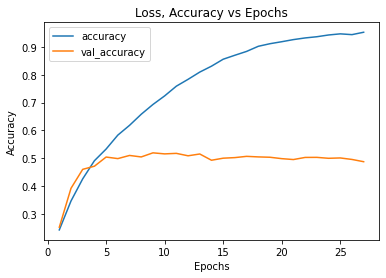

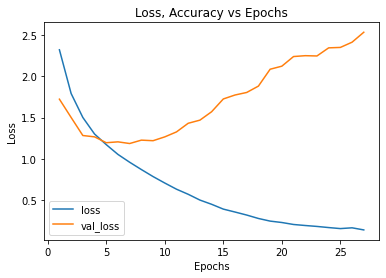

In [ ]:
#plot the learning curves
import matplotlib
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label = 'accuracy')
plt.plot(epochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
!zip -r /content/model8.zip /content/model8

  adding: content/model8/ (stored 0%)
  adding: content/model8/variables/ (stored 0%)
  adding: content/model8/variables/variables.index (deflated 69%)
  adding: content/model8/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model8/fingerprint.pb (stored 0%)
  adding: content/model8/saved_model.pb (deflated 90%)
  adding: content/model8/keras_metadata.pb (deflated 92%)
  adding: content/model8/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download('/content/model8.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Re-Evaluation

In [ ]:
!unzip -uq "/content/model8.zip" -d "/"

250/250 [==============================] - 2s 6ms/step
[[   0    0   26   53    4]
 [   0    1  125  242   34]
 [   0    7  760 1539  146]
 [   0   11 1103 2341  242]
 [   0    5  406  868   87]]
              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        83
           2     0.0417    0.0025    0.0047       402
           3     0.3140    0.3100    0.3120      2452
           4     0.4642    0.6332    0.5357      3697
           5     0.1696    0.0637    0.0926      1366

    accuracy                         0.3986      8000
   macro avg     0.1979    0.2019    0.1890      8000
weighted avg     0.3418    0.3986    0.3592      8000

(0.398625, 0.398625, 0.398625, None)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


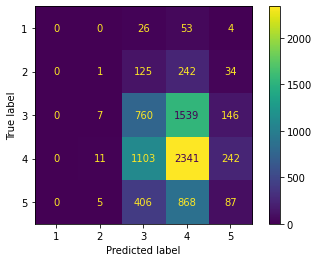

In [ ]:
model = keras.models.load_model("model8")
preds = model.predict(int_test_ds)
preds = np.argmax(preds, axis=1)+1
truths = np.concatenate([y for x, y in int_test_ds.as_numpy_iterator()], axis=0)
truths = np.argmax(truths, axis=1)+1

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay, classification_report

print(confusion_matrix(truths, preds))
print(classification_report(truths, preds, digits=4))
print(precision_recall_fscore_support(truths, preds, average='micro'))

ConfusionMatrixDisplay.from_predictions(truths, preds)

## More reduced learning rate

In [ ]:
tf.random.set_seed(42)

def get_model():
  # One input is a sequence of integers.
  inputs = Input(shape=(None,), dtype="int64")
  # Encode the integers into binary 20,000-dimensional vectors
  embedded = tf.one_hot(inputs, depth=max_tokens)
  x = layers.Conv1D(64, 3, activation="relu", kernel_initializer="he_normal")(embedded)
  x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x = BatchNormalization()(x)
  x = layers.Dropout(0.1)(x)
  x = layers.Conv1D(64, 3, activation="relu", kernel_initializer="he_normal")(x)
  x = layers.MaxPooling1D(pool_size=2, strides=2)(x)
  x = BatchNormalization()(x)
  x = layers.Dropout(0.1)(x)

  x = Bidirectional(LSTM(units=64, activation="tanh", kernel_initializer="he_normal"))(x)
  x = BatchNormalization()(x)
  x = Dropout(0.5)(x)
  # Add a classification Layer
  outputs = Dense(5, activation="softmax")(x)
  model = Model(inputs, outputs)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
      loss="categorical_crossentropy",
      metrics=["accuracy"])
  return model

In [ ]:
model = get_model()
model.summary()

### Refit Model

In [ ]:
history = model.fit(int_train_ds,
          validation_data=int_val_ds,
          epochs=1000,
          callbacks=[model_checkpoint_cb10, reduce_lr_cb, early_stopping_cb])

Epoch 1/1000
751/751 [==============================] - ETA: 0s - loss: 0.8537 - accuracy: 0.6728

751/751 [==============================] - 31s 33ms/step - loss: 0.8537 - accuracy: 0.6728 - val_loss: 1.2978 - val_accuracy: 0.4855 - lr: 1.0000e-05
Epoch 2/1000
751/751 [==============================] - 12s 15ms/step - loss: 0.8340 - accuracy: 0.6817 - val_loss: 1.2872 - val_accuracy: 0.4829 - lr: 1.0000e-05
Epoch 3/1000
751/751 [==============================] - 11s 15ms/step - loss: 0.8101 - accuracy: 0.6922 - val_loss: 1.3026 - val_accuracy: 0.4795 - lr: 1.0000e-05
Epoch 4/1000
751/751 [==============================] - 11s 15ms/step - loss: 0.7892 - accuracy: 0.7036 - val_loss: 1.2969 - val_accuracy: 0.4834 - lr: 1.0000e-05
Epoch 5/1000
751/751 [==============================] - 11s 15ms/step - loss: 0.7702 - accuracy: 0.7123 - val_loss: 1.3186 - val_accuracy: 0.4782 - lr: 1.0000e-05
Epoch 6/1000
751/751 [==============================] - 11s 15ms/step - loss: 0.7466 - accuracy: 0.7192 - val_loss: 1.3233 - val_accuracy: 0.4849 - lr: 1.0000e-05
Epoch 7/1000
751/751 [=============

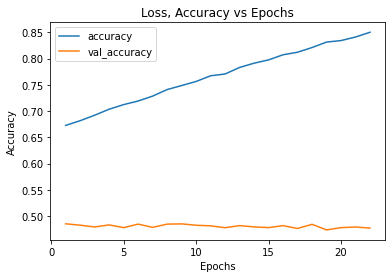

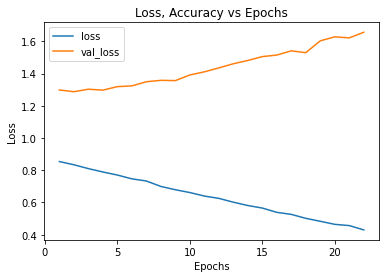

In [ ]:
#plot the learning curves
import matplotlib
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label = 'accuracy')
plt.plot(epochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label = 'loss')
plt.plot(epochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
!zip -r /content/model10.zip /content/model10

  adding: content/model10/ (stored 0%)
  adding: content/model10/variables/ (stored 0%)
  adding: content/model10/variables/variables.index (deflated 71%)
  adding: content/model10/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model10/fingerprint.pb (stored 0%)
  adding: content/model10/saved_model.pb (deflated 90%)
  adding: content/model10/keras_metadata.pb (deflated 93%)
  adding: content/model10/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download('/content/model10.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Re-Evaluation

In [ ]:
!unzip -uq "/content/model10.zip" -d "/"

250/250 [==============================] - 2s 5ms/step
[[   0    0   13   64    6]
 [   0    0   49  301   52]
 [   1    1  302 1820  328]
 [   0    4  464 2745  484]
 [   1    0  169 1027  169]]
              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        83
           2     0.0000    0.0000    0.0000       402
           3     0.3029    0.1232    0.1751      2452
           4     0.4608    0.7425    0.5687      3697
           5     0.1627    0.1237    0.1405      1366

    accuracy                         0.4020      8000
   macro avg     0.1853    0.1979    0.1769      8000
weighted avg     0.3336    0.4020    0.3405      8000

(0.402, 0.402, 0.402, None)


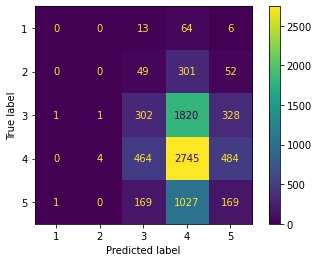

In [ ]:
model = keras.models.load_model("model10")
preds = model.predict(int_test_ds)
preds = np.argmax(preds, axis=1)+1
truths = np.concatenate([y for x, y in int_test_ds.as_numpy_iterator()], axis=0)
truths = np.argmax(truths, axis=1)+1

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay, classification_report

print(confusion_matrix(truths, preds))
print(classification_report(truths, preds, digits=4))
print(precision_recall_fscore_support(truths, preds, average='micro'))

ConfusionMatrixDisplay.from_predictions(truths, preds)